In [1]:
import os
import re
from pathlib import Path

import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['figure.dpi'] = 300

In [3]:
figdir = '../results/figures/ecotyper_v1'
Path(figdir).mkdir(parents=True, exist_ok=True)
sc.settings.figdir = figdir

In [4]:
combined = None

tcga

In [5]:
e = pd.read_csv('../data/ecotyper/results/denovo_discovery/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
e

,MaxEcotype,AssignmentP,AssignmentQ,AssignedToEcotypeStates,Ecotype
ID,,,,,
TCGA_2J_AABT_01A_11R_A41B_07,E1,4.361924e-04,0.002166,True,E1
TCGA_HZ_A4BH_01A_11R_A26U_07,E1,3.686087e-02,0.052307,True,E1
TCGA_3A_A9IX_01A_11R_A41B_07,E1,1.116447e-02,0.020287,True,E1
TCGA_XN_A8T5_01A_12R_A36G_07,E1,1.468306e-06,0.000022,True,E1
TCGA_HZ_8519_01A_11R_2404_07,E1,9.639401e-04,0.003990,True,E1
...,...,...,...,...,...
TCGA_3E_AAAY_01A_11R_A38C_07,E6,7.166613e-02,0.090010,True,E6
TCGA_IB_AAUO_01A_12R_A38C_07,E6,9.042691e-04,0.003850,True,E6
TCGA_3A_A9I5_01A_11R_A38C_07,E6,1.026453e-02,0.019380,True,E6


In [6]:
clinical = pd.read_csv('../data/ecotyper/bulk/tcga_annotations.txt', sep='\t'
                      ).set_index('ID')
clinical['Censor'] = [2 if v=='Dead' else 1 for v in clinical['Vital_status']]
clinical

,Purity,Moffit,Collison,Bailey,Methylation,Copy_Number,RPPA,KRAS_mutation,Vital_status,Stage,Radiation_therapy,Survival_time,Status,Censor
ID,,,,,,,,,,,,,,
TCGA_2J_AAB1_01A_11R_A41B_07,high,classical,classical,pancreatic progenitor,1,Low,unassigned,yes,Dead,stage i,no,3.0,1.0,2
TCGA_2J_AAB4_01A_12R_A41B_07,low,classical,classical,pancreatic progenitor,unassigned,Low,unassigned,yes,Alive,stage i,no,25.0,2.0,1
TCGA_2J_AAB6_01A_11R_A41B_07,high,basal,quasi-mesanchymal,squamous-like,1,Low,unassigned,yes,Dead,stage i,no,10.0,1.0,2
TCGA_2J_AAB8_01A_12R_A41B_07,low,classical,classical,pancreatic progenitor,1,High,unassigned,yes,Alive,stage i,unassigned,3.0,2.0,1
TCGA_2J_AAB9_01A_11R_A41B_07,low,basal,exocrine,ADEX,unassigned,Low,unassigned,yes,Dead,stage i,yes,21.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA_XN_A8T5_01A_12R_A36G_07,low,basal,quasi-mesanchymal,immunogenic,unassigned,non-Aneuploid,3,yes,Alive,stage i,yes,25.0,2.0,1
TCGA_YB_A89D_01A_12R_A36G_07,low,classical,classical,pancreatic progenitor,2,Low,2,yes,Alive,stage i,yes,12.0,2.0,1
TCGA_YH_A8SY_01A_11R_A37L_07,low,basal,quasi-mesanchymal,squamous-like,2,High,1,yes,Alive,stage i,yes,13.0,2.0,1


In [7]:
combined = pd.DataFrame.from_dict(e[['AssignmentP', 'Ecotype']])
combined = pd.merge(combined, clinical[['Survival_time', 'Censor']], left_index=True, right_index=True)
combined.columns = ['assignment_pvalue', 'ecotype', 'survival_time', 'censor']
combined['dataset'] = 'tcga'
combined

,assignment_pvalue,ecotype,survival_time,censor,dataset
ID,,,,,
TCGA_2J_AABT_01A_11R_A41B_07,4.361924e-04,E1,11.0,1,tcga
TCGA_HZ_A4BH_01A_11R_A26U_07,3.686087e-02,E1,7.0,1,tcga
TCGA_3A_A9IX_01A_11R_A41B_07,1.116447e-02,E1,35.0,1,tcga
TCGA_XN_A8T5_01A_12R_A36G_07,1.468306e-06,E1,25.0,1,tcga
TCGA_HZ_8519_01A_11R_2404_07,9.639401e-04,E1,16.0,1,tcga
...,...,...,...,...,...
TCGA_3E_AAAY_01A_11R_A38C_07,7.166613e-02,E6,77.0,1,tcga
TCGA_IB_AAUO_01A_12R_A38C_07,9.042691e-04,E6,8.0,2,tcga
TCGA_3A_A9I5_01A_11R_A38C_07,1.026453e-02,E6,60.0,1,tcga


moffit

In [8]:
e = pd.read_csv('../data/ecotyper/results/bulk_recovery_moffit/moffit/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
e

,MaxEcotype,AssignmentP,AssignmentQ,AssignedToEcotypeStates,Ecotype
ID,,,,,
GSM1844105,E1,0.002478,0.013818,True,E1
GSM1844114,E1,0.082534,0.124661,True,E1
GSM1844122,E1,0.005411,0.021203,True,E1
GSM1844131,E1,0.155467,0.184776,True,E1
GSM1844134,E1,0.011905,0.036729,True,E1
...,...,...,...,...,...
GSM1844193,E6,0.130320,0.162900,True,E6
GSM1844196,E6,0.021499,0.053748,True,E6
GSM1844232,E6,0.010787,0.034002,True,E6


In [9]:
clinical = pd.read_csv('../data/bulk_rna_seq/moffit/metadata.tsv', sep='\t')
clinical = clinical.set_index('sample_id')
clinical.columns = ['source', 'cell line/tissue', 'death_event_1death_0censor', 'stroma', 'survival_time',
                           'tissue_type', 'tumor_subtype']

clinical = clinical[clinical['survival_time'] > 0]
clinical['censor'] = [int(x) + 1 for x in clinical['death_event_1death_0censor']]
clinical.columns = [x.replace(' ', '_') for x in clinical.columns]

clinical

,source,cell_line/tissue,death_event_1death_0censor,stroma,survival_time,tissue_type,tumor_subtype,censor
sample_id,,,,,,,,
GSM1844112,Pancreas_Primary,Pancreas,1.0,1,7.0,Primary,2,2
GSM1844113,Pancreas_Primary,Pancreas,1.0,3,11.0,Primary,2,2
GSM1844114,Pancreas_Primary,Pancreas,0.0,2,47.0,Primary,1,1
GSM1844115,Pancreas_Primary,Pancreas,1.0,3,10.0,Primary,1,2
GSM1844116,Pancreas_Primary,Pancreas,1.0,3,1.0,Primary,1,2
...,...,...,...,...,...,...,...,...
GSM1844238,Pancreas_Primary,Pancreas,1.0,3,17.0,Primary,1,2
GSM1844239,Pancreas_Primary,Pancreas,0.0,3,1.0,Primary,1,1
GSM1844240,Pancreas_Primary,Pancreas,1.0,2,20.0,Primary,1,2


In [10]:
c = pd.DataFrame.from_dict(e[['AssignmentP', 'Ecotype']])
c = pd.merge(c, clinical[['survival_time', 'censor']], left_index=True, right_index=True)
c.columns = ['assignment_pvalue', 'ecotype', 'survival_time', 'censor']
c['dataset'] = 'moffit'
c

,assignment_pvalue,ecotype,survival_time,censor,dataset
GSM1844114,0.082534,E1,47.0,1,moffit
GSM1844122,0.005411,E1,52.0,1,moffit
GSM1844131,0.155467,E1,6.0,2,moffit
GSM1844134,0.011905,E1,35.0,2,moffit
GSM1844136,0.013906,E1,21.0,2,moffit
...,...,...,...,...,...
GSM1844159,0.026971,E6,10.0,2,moffit
GSM1844164,0.007296,E6,7.0,2,moffit
GSM1844193,0.130320,E6,13.0,2,moffit
GSM1844196,0.021499,E6,4.0,2,moffit


In [11]:
combined = pd.concat((combined, c), axis=0)
combined

,assignment_pvalue,ecotype,survival_time,censor,dataset
TCGA_2J_AABT_01A_11R_A41B_07,0.000436,E1,11.0,1,tcga
TCGA_HZ_A4BH_01A_11R_A26U_07,0.036861,E1,7.0,1,tcga
TCGA_3A_A9IX_01A_11R_A41B_07,0.011164,E1,35.0,1,tcga
TCGA_XN_A8T5_01A_12R_A36G_07,0.000001,E1,25.0,1,tcga
TCGA_HZ_8519_01A_11R_2404_07,0.000964,E1,16.0,1,tcga
...,...,...,...,...,...
GSM1844159,0.026971,E6,10.0,2,moffit
GSM1844164,0.007296,E6,7.0,2,moffit
GSM1844193,0.130320,E6,13.0,2,moffit
GSM1844196,0.021499,E6,4.0,2,moffit


bailey

In [12]:
e = pd.read_csv('../data/ecotyper/results/bulk_recovery_bailey/bailey/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
e

,MaxEcotype,AssignmentP,AssignmentQ,AssignedToEcotypeStates,Ecotype
ID,,,,,
SA518868,E1,0.001157,0.021296,True,E1
SA518873,E1,0.047127,0.104401,True,E1
SA518624,E1,0.103476,0.156062,True,E1
SA518701,E1,0.049009,0.104856,True,E1
SA518615,E1,0.000507,0.011670,True,E1
...,...,...,...,...,...
SA412060,E6,0.019778,0.067393,True,E6
SA411841,E6,0.017483,0.061864,True,E6
SA411430,E6,0.010268,0.053115,True,E6


In [13]:
clinical = pd.read_csv('../data/bulk_rna_seq/bailey/metadata.tsv', sep='\t')
clinical = clinical.set_index('icgc_sample_id')

mask = [not pd.isnull(x) for x in clinical['donor_vital_status']]
clinical = clinical[mask]

clinical['survival_time'] = [int(x / 30) + 1 if not pd.isnull(x) else x
                                    for x in clinical['donor_survival_time']]
clinical['censor'] = [1 if vs == 'alive' else 2 for vs in clinical['donor_vital_status']]

clinical

,project_code_x,submitted_sample_id,icgc_specimen_id,submitted_specimen_id,icgc_donor_id,submitted_donor_id_x,analyzed_sample_interval,percentage_cellularity,level_of_cellularity,study,...,donor_tumour_staging_system_at_diagnosis,donor_tumour_stage_at_diagnosis,donor_tumour_stage_at_diagnosis_supplemental,donor_survival_time,donor_interval_of_last_followup,prior_malignancy,cancer_type_prior_malignancy,cancer_history_first_degree_relative,survival_time,censor
icgc_sample_id,,,,,,,,,,,,,,,,,,,,,
SA518850,PACA-AU,8070199,SP108123,8070199,DO49204,ICGC_0543,NaN,64.0,61-80%,PCAWG,...,TNM,NaN,NaN,156.0,156.0,unknown,NaN,unknown,6,2
SA518852,PACA-AU,8070201,SP108126,8070201,DO49204,ICGC_0543,NaN,NaN,NaN,PCAWG,...,TNM,NaN,NaN,156.0,156.0,unknown,NaN,unknown,6,2
SA518851,PACA-AU,8070200,SP108125,8070200,DO49204,ICGC_0543,NaN,NaN,NaN,NaN,...,TNM,NaN,NaN,156.0,156.0,unknown,NaN,unknown,6,2
SA518789,PACA-AU,8069334,SP108103,8069334,DO49198,ICGC_0512,NaN,48.0,41-60%,NaN,...,TNM,NaN,NaN,251.0,251.0,unknown,NaN,unknown,9,2
SA528766,PACA-AU,8069050,SP110832,8069050,DO49198,ICGC_0512,NaN,NaN,NaN,NaN,...,TNM,NaN,NaN,251.0,251.0,unknown,NaN,unknown,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SA411342,PACA-AU,8044115,SP71894,8044115,DO33528,ICGC_0119,NaN,16.0,1-20%,NaN,...,NaN,NaN,NaN,343.0,343.0,unknown,NaN,unknown,12,2
SA411674,PACA-AU,8048316,SP72222,8048316,DO33528,ICGC_0119,NaN,99.0,>81%,NaN,...,NaN,NaN,NaN,343.0,343.0,unknown,NaN,unknown,12,2
SA411369,PACA-AU,8044121,SP71918,8044121,DO33528,ICGC_0119,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,343.0,343.0,unknown,NaN,unknown,12,2


In [14]:
c = pd.DataFrame.from_dict(e[['AssignmentP', 'Ecotype']])
c = pd.merge(c, clinical[['survival_time', 'censor']], left_index=True, right_index=True)
c.columns = ['assignment_pvalue', 'ecotype', 'survival_time', 'censor']
c['dataset'] = 'bailey'
c

,assignment_pvalue,ecotype,survival_time,censor,dataset
SA518868,0.001157,E1,5,1,bailey
SA518873,0.047127,E1,7,1,bailey
SA518624,0.103476,E1,10,1,bailey
SA518701,0.049009,E1,8,1,bailey
SA518615,0.000507,E1,14,1,bailey
...,...,...,...,...,...
SA412060,0.019778,E6,6,2,bailey
SA411841,0.017483,E6,37,2,bailey
SA411430,0.010268,E6,30,1,bailey
SA411305,0.052893,E6,17,2,bailey


In [15]:
combined = pd.concat((combined, c), axis=0)
combined

,assignment_pvalue,ecotype,survival_time,censor,dataset
TCGA_2J_AABT_01A_11R_A41B_07,0.000436,E1,11.0,1,tcga
TCGA_HZ_A4BH_01A_11R_A26U_07,0.036861,E1,7.0,1,tcga
TCGA_3A_A9IX_01A_11R_A41B_07,0.011164,E1,35.0,1,tcga
TCGA_XN_A8T5_01A_12R_A36G_07,0.000001,E1,25.0,1,tcga
TCGA_HZ_8519_01A_11R_2404_07,0.000964,E1,16.0,1,tcga
...,...,...,...,...,...
SA412060,0.019778,E6,6.0,2,bailey
SA411841,0.017483,E6,37.0,2,bailey
SA411430,0.010268,E6,30.0,1,bailey
SA411305,0.052893,E6,17.0,2,bailey


kirby

In [16]:
e = pd.read_csv('../data/ecotyper/results/bulk_recovery_kirby/kirby/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
e

,MaxEcotype,AssignmentP,AssignmentQ,AssignedToEcotypeStates,Ecotype
ID,,,,,
T_07_07_A082a,E1,0.011640,0.060050,True,E1
T_07_11_A090a,E1,0.003919,0.033310,True,E1
T_10_11_A059a,E1,0.000491,0.012166,True,E1
T_07_02_A073a,E1,0.008575,0.054662,True,E1
T_07_10_A153a_1,E1,0.020310,0.064737,True,E1
T_08_06_A060a,E1,0.013139,0.060917,True,E1
T_11_04_A026b,E1,0.003404,0.033310,True,E1
T_11_06_A011a,E1,0.016093,0.063088,True,E1
T_08_01_A194a,E2,0.160655,0.227595,True,E2


In [17]:
clinical = pd.read_csv('../data/bulk_rna_seq/kirby/GSE79668_metadata.tsv', sep='\t')
clinical['sample_id'] = ['_'.join(x.split('_')[:4]) for x in clinical['sample_id']]
clinical = clinical.set_index('sample_id')
clinical['survival_time'] = [int(x / 30) + 1 if not pd.isnull(x) else x
                                    for x in clinical['survival_time']]
clinical['censor'] = [1 if vs == 'Alive' else 2 for vs in clinical['vital_status']]
clinical.index.name = 'sample_id'

clinical

,vital_status,survival_time,age,race,gender,t_tnm_score,n_tnm_score,m_tnm_score,diabetes_status,censor
sample_id,,,,,,,,,,
T_07_07_A082a,Dead,14,59,white,female,T3,N1,M0,no,2
T_06_01_A033a,Dead,15,53,white,male,T3,N0,M0,yes,2
T_06_11_A168a,Dead,24,77,white,female,T3,N1,M0,no,2
T_06_04_A296a,Dead,25,62,white,female,T3,N1,M0,no,2
T_07_11_A090a,Dead,19,69,white,female,T3,N1,M0,yes,2
T_06_06_A349a,Dead,20,56,white,male,T1,N1,M0,no,2
T_11_03_A138a,Dead,13,51,white,male,T3,N0,M0,no,2
T_03_11_A244a,Dead,42,70,white,male,T4,N1,M0,yes,2
T_10_11_A059a,Dead,53,64,white,male,T1,N0,M0,yes,2


In [18]:
c = pd.DataFrame.from_dict(e[['AssignmentP', 'Ecotype']])
c = pd.merge(c, clinical[['survival_time', 'censor']], left_index=True, right_index=True)
c.columns = ['assignment_pvalue', 'ecotype', 'survival_time', 'censor']
c['dataset'] = 'kirby'
c

,assignment_pvalue,ecotype,survival_time,censor,dataset
T_07_07_A082a,0.011640,E1,14,2,kirby
T_07_11_A090a,0.003919,E1,19,2,kirby
T_10_11_A059a,0.000491,E1,53,2,kirby
T_07_02_A073a,0.008575,E1,100,1,kirby
T_08_06_A060a,0.013139,E1,19,2,kirby
T_11_04_A026b,0.003404,E1,51,1,kirby
T_11_06_A011a,0.016093,E1,11,2,kirby
T_08_01_A194a,0.160655,E2,10,2,kirby
T_06_06_A349a,0.112087,E3,20,2,kirby
T_07_08_A346a,0.084726,E3,7,2,kirby


In [19]:
combined = pd.concat((combined, c), axis=0)
combined

,assignment_pvalue,ecotype,survival_time,censor,dataset
TCGA_2J_AABT_01A_11R_A41B_07,0.000436,E1,11.0,1,tcga
TCGA_HZ_A4BH_01A_11R_A26U_07,0.036861,E1,7.0,1,tcga
TCGA_3A_A9IX_01A_11R_A41B_07,0.011164,E1,35.0,1,tcga
TCGA_XN_A8T5_01A_12R_A36G_07,0.000001,E1,25.0,1,tcga
TCGA_HZ_8519_01A_11R_2404_07,0.000964,E1,16.0,1,tcga
...,...,...,...,...,...
T_11_02_A148a,0.000057,E5,21.0,2,kirby
T_04_04_A207b,0.028475,E6,22.0,2,kirby
T_05_03_A215c,0.011775,E6,15.0,2,kirby
T_06_11_A299b,0.048139,E6,27.0,2,kirby


## analysis

<AxesSubplot:xlabel='ecotype', ylabel='survival_time'>

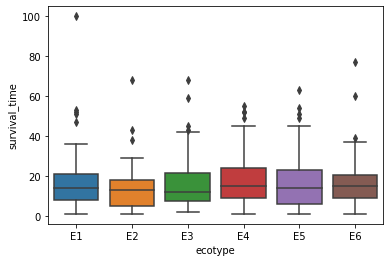

In [104]:
sns.boxplot(data=combined, x='ecotype', y='survival_time')

<AxesSubplot:xlabel='ecotype', ylabel='survival_time'>

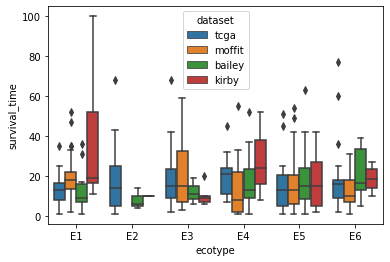

In [105]:
sns.boxplot(data=combined, x='ecotype', y='survival_time', hue='dataset')

<AxesSubplot:xlabel='dataset', ylabel='survival_time'>

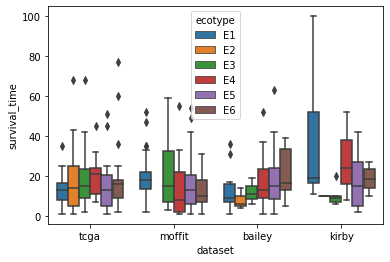

In [106]:
sns.boxplot(data=combined, x='dataset', y='survival_time', hue='ecotype')

<AxesSubplot:xlabel='dataset', ylabel='survival_time'>

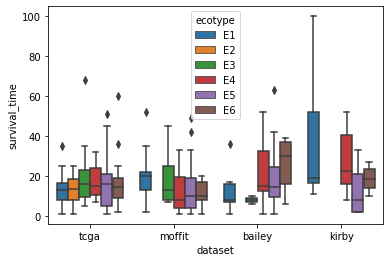

In [107]:
sns.boxplot(data=combined[combined['assignment_pvalue']<=.05], x='dataset', y='survival_time', hue='ecotype')

In [46]:
from lifelines import CoxPHFitter, KaplanMeierFitter

In [43]:
import altair as alt

In [53]:
ft

,assignment_pvalue,ecotype,survival_time,censor,dataset
TCGA_2J_AABT_01A_11R_A41B_07,0.000436,E1,11.0,1,tcga
TCGA_HZ_A4BH_01A_11R_A26U_07,0.036861,E1,7.0,1,tcga
TCGA_3A_A9IX_01A_11R_A41B_07,0.011164,E1,35.0,1,tcga
TCGA_XN_A8T5_01A_12R_A36G_07,0.000001,E1,25.0,1,tcga
TCGA_HZ_8519_01A_11R_2404_07,0.000964,E1,16.0,1,tcga
...,...,...,...,...,...
T_11_02_A148a,0.000057,E5,21.0,2,kirby
T_04_04_A207b,0.028475,E6,22.0,2,kirby
T_05_03_A215c,0.011775,E6,15.0,2,kirby
T_06_11_A299b,0.048139,E6,27.0,2,kirby


In [60]:
~pd.isnull(combined)['survival_time']

TCGA_2J_AABT_01A_11R_A41B_07    True
TCGA_HZ_A4BH_01A_11R_A26U_07    True
TCGA_3A_A9IX_01A_11R_A41B_07    True
TCGA_XN_A8T5_01A_12R_A36G_07    True
TCGA_HZ_8519_01A_11R_2404_07    True
                                ... 
T_11_02_A148a                   True
T_04_04_A207b                   True
T_05_03_A215c                   True
T_06_11_A299b                   True
T_07_02_A216a                   True
Name: survival_time, Length: 351, dtype: bool

In [62]:
ft

,assignment_pvalue,ecotype,survival_time,censor,dataset
TCGA_2J_AABT_01A_11R_A41B_07,0.000436,E1,11.0,1,tcga
TCGA_HZ_A4BH_01A_11R_A26U_07,0.036861,E1,7.0,1,tcga
TCGA_3A_A9IX_01A_11R_A41B_07,0.011164,E1,35.0,1,tcga
TCGA_XN_A8T5_01A_12R_A36G_07,0.000001,E1,25.0,1,tcga
TCGA_HZ_8519_01A_11R_2404_07,0.000964,E1,16.0,1,tcga
...,...,...,...,...,...
T_11_02_A148a,0.000057,E5,21.0,2,kirby
T_04_04_A207b,0.028475,E6,22.0,2,kirby
T_05_03_A215c,0.011775,E6,15.0,2,kirby
T_06_11_A299b,0.048139,E6,27.0,2,kirby


In [66]:
E

TCGA_2J_AABT_01A_11R_A41B_07    1
TCGA_HZ_A4BH_01A_11R_A26U_07    1
TCGA_3A_A9IX_01A_11R_A41B_07    1
TCGA_XN_A8T5_01A_12R_A36G_07    1
TCGA_HZ_8519_01A_11R_2404_07    1
                               ..
T_11_02_A148a                   2
T_04_04_A207b                   2
T_05_03_A215c                   2
T_06_11_A299b                   2
T_07_02_A216a                   2
Name: censor, Length: 347, dtype: int64

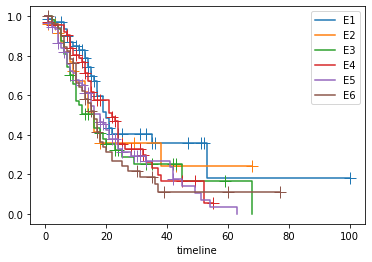

In [73]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]

for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

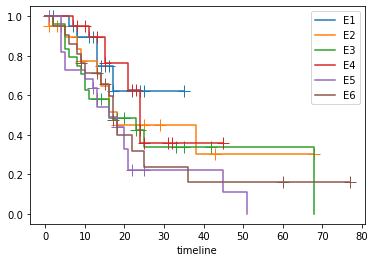

In [72]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['dataset']=='tcga']

for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

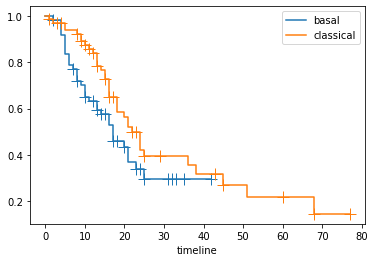

In [83]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['dataset']=='tcga']

clinical = pd.read_csv('../data/ecotyper/bulk/tcga_annotations.txt', sep='\t'
                      ).set_index('ID')

ft = pd.merge(ft, clinical, left_index=True, right_index=True)

for e in sorted(set(ft['Moffit'])):
    kmf.fit(ft[ft['Moffit']==e]['survival_time'],
            ft[ft['Moffit']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )



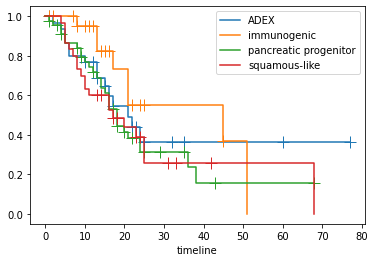

In [84]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['dataset']=='tcga']

clinical = pd.read_csv('../data/ecotyper/bulk/tcga_annotations.txt', sep='\t'
                      ).set_index('ID')

ft = pd.merge(ft, clinical, left_index=True, right_index=True)

for e in sorted(set(ft['Bailey'])):
    kmf.fit(ft[ft['Bailey']==e]['survival_time'],
            ft[ft['Bailey']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )



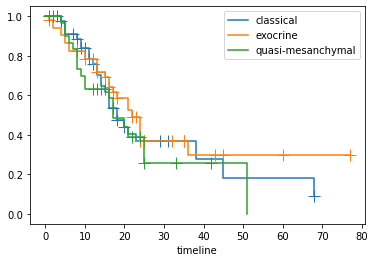

In [85]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['dataset']=='tcga']

clinical = pd.read_csv('../data/ecotyper/bulk/tcga_annotations.txt', sep='\t'
                      ).set_index('ID')

ft = pd.merge(ft, clinical, left_index=True, right_index=True)

for e in sorted(set(ft['Collison'])):
    kmf.fit(ft[ft['Collison']==e]['survival_time'],
            ft[ft['Collison']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )



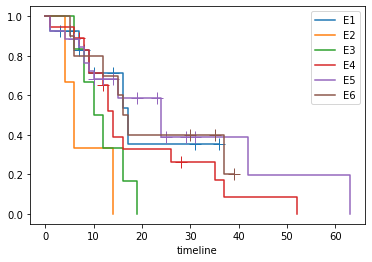

In [74]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['dataset']=='bailey']

for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

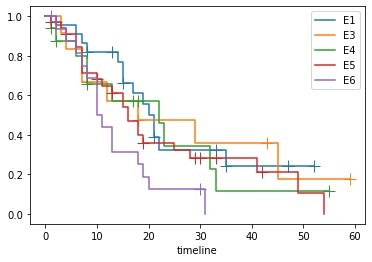

In [75]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['dataset']=='moffit']

for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

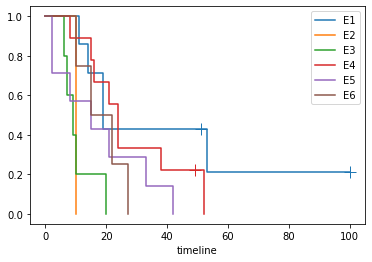

In [76]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['dataset']=='kirby']

for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

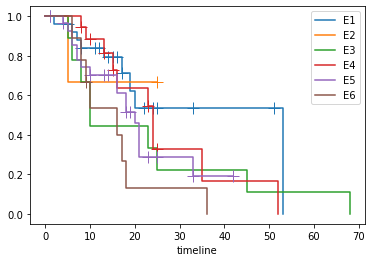

In [78]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['assignment_pvalue']<.005]

for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

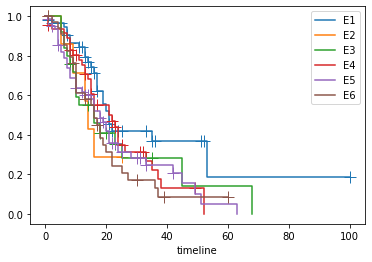

In [79]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
ft = ft[ft['assignment_pvalue']<.05]

for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

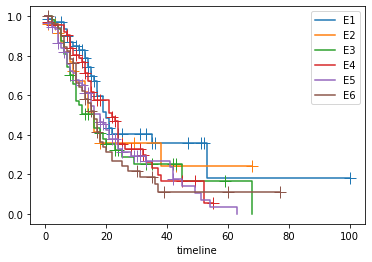

In [80]:
kmf = KaplanMeierFitter()
mask = ~pd.isnull(combined)['survival_time']
ft = combined.copy()[list(mask)]
# ft = ft[ft['assignment_pvalue']<.05]

for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

###### malignant state overlap

In [36]:
es = pd.read_csv('../data/ecotyper/results/denovo_discovery/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
es.index = [x[:12].replace('_', '-') for x in es.index]

bailey = pd.read_csv('../data/ecotyper/results/bulk_recovery_bailey/bailey/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
moffit = pd.read_csv('../data/ecotyper/results/bulk_recovery_moffit/moffit/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
kirby = pd.read_csv('../data/ecotyper/results/bulk_recovery_kirby/kirby/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
es = pd.concat((es, bailey, moffit, kirby))
es

,MaxEcotype,AssignmentP,AssignmentQ,AssignedToEcotypeStates,Ecotype
TCGA-2J-AABT,E1,0.000436,0.002166,True,E1
TCGA-HZ-A4BH,E1,0.036861,0.052307,True,E1
TCGA-3A-A9IX,E1,0.011164,0.020287,True,E1
TCGA-XN-A8T5,E1,0.000001,0.000022,True,E1
TCGA-HZ-8519,E1,0.000964,0.003990,True,E1
...,...,...,...,...,...
T_11_02_A148a,E5,0.000057,0.002902,True,E5
T_04_04_A207b,E6,0.028475,0.066545,True,E6
T_05_03_A215c,E6,0.011775,0.060050,True,E6
T_06_11_A299b,E6,0.048139,0.090929,True,E6


In [22]:
# es['State'] = es['Ecotype'].to_list()

In [23]:
integrated = sc.read_h5ad('../results/survival/05242021/integrated_v2.h5ad')
integrated

AnnData object with n_obs × n_vars = 391 × 21
    obs: 'age', 'gender', 'race', 'tumor_stage', 'survival_time', 'status', 'dataset', 'Malignant_0_tumor_fraction', 'Malignant_1_tumor_fraction', 'Malignant_2_tumor_fraction', 'Malignant_3_tumor_fraction', 'Malignant_4_tumor_fraction', 'leiden'
    uns: 'dataset_colors', "dendrogram_['leiden']", 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'

In [24]:
names = {
    '0': 'Classical Low',
    '1': 'ADEX',
    '2': 'CAF High',
    '3': 'Basal/Classical',
    '4': 'Basal',
    '5': 'Mixed - Immune High',
    '6': 'Classical High',
}
integrated.obs['cluster'] = [names[x] for x in integrated.obs['leiden']]

In [25]:
integrated.obs

,age,gender,race,tumor_stage,survival_time,status,dataset,Malignant_0_tumor_fraction,Malignant_1_tumor_fraction,Malignant_2_tumor_fraction,Malignant_3_tumor_fraction,Malignant_4_tumor_fraction,leiden,cluster
SA518851,67.0,male,unknown,unknown,5,2,bailey,0.067734,0.000000,0.770468,0.127692,0.034106,4,Basal
SA528766,61.0,female,unknown,unknown,8,2,bailey,0.548283,0.039154,0.202108,0.000000,0.210455,0,Classical Low
SA528763,52.0,male,unknown,unknown,36,2,bailey,0.843169,0.095722,0.000000,0.000000,0.061109,2,CAF High
SA518854,55.0,male,unknown,unknown,5,1,bailey,0.588064,0.000000,0.204188,0.133946,0.073802,2,CAF High
SA518806,51.0,female,unknown,unknown,14,2,bailey,0.629661,0.017354,0.246252,0.034876,0.071858,2,CAF High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,68.0,male,white,unknown,20,2,kirby,0.414887,0.240987,0.067763,0.186472,0.089891,0,Classical Low
T_11_04_A026b,64.0,female,white,unknown,49,1,kirby,0.498230,0.130810,0.067889,0.080138,0.222934,5,Mixed - Immune High
T_11_05_A018b,76.0,male,white,unknown,36,2,kirby,0.358808,0.379275,0.076582,0.025945,0.159389,6,Classical High
T_11_06_A011a,68.0,female,white,unknown,10,2,kirby,0.617157,0.000000,0.165348,0.108672,0.108823,0,Classical Low


In [26]:
from scipy.spatial.distance import jaccard

In [27]:
overlap = sorted(set(es.index).intersection(set(integrated.obs.index)))
es = es.loc[overlap]
ns = integrated.obs.loc[overlap]
len(overlap)

325

In [72]:
def get_overlap_matrix(meta, integrated, meta_key='State', integrated_key='cluster'):
    es = meta.copy()
    overlap = sorted(set(es.index).intersection(set(integrated.obs.index)))
    es = es.loc[overlap]
    ns = integrated.obs.loc[overlap]
    
    data = []
    for e_m in sorted(set(es[meta_key])):
        for i_m in sorted(set(ns[integrated_key])):
            o = set(es[es[meta_key]==e_m].index).intersection(set(ns[ns[integrated_key]==i_m].index))
            m = len(o) / ns[ns[integrated_key]==i_m].shape[0]
            data.append([e_m, i_m, m])
    df = pd.DataFrame(data=data, columns=[meta_key, integrated_key, 'similarity metric'])

    return df

In [143]:
get_overlap_matrix(es, integrated)

,State,cluster,similarity metric
0,E1,ADEX,0.192308
1,E1,Basal,0.214286
2,E1,Basal/Classical,0.153846
3,E1,CAF High,0.215686
4,E1,Classical High,0.000000
5,E1,Classical Low,0.157895
6,E1,Mixed - Immune High,0.555556
7,E2,ADEX,0.025641
8,E2,Basal,0.000000
9,E2,Basal/Classical,0.000000


In [86]:
data = []
for e_m in sorted(set(es['State'])):
    for i_m in sorted(set(ns['cluster'])):
#         m = jaccard(es['State']==e_m, ns['cluster']==i_m)
        o = set(es[es['State']==e_m].index).intersection(set(ns[ns['cluster']==i_m].index))
        m = len(o) / ns[ns['cluster']==i_m].shape[0]
        data.append([e_m, i_m, m])
df = pd.DataFrame(data=data, columns=['ecotyper_state', 'integrated_state', 'similarity metric'])
df

,ecotyper_state,integrated_state,similarity metric
0,E1,ADEX,0.192308
1,E1,Basal,0.214286
2,E1,Basal/Classical,0.153846
3,E1,CAF High,0.215686
4,E1,Classical High,0.000000
5,E1,Classical Low,0.157895
6,E1,Mixed - Immune High,0.555556
7,E2,ADEX,0.025641
8,E2,Basal,0.000000
9,E2,Basal/Classical,0.000000


In [90]:
source = df
alt.Chart(source).mark_circle().encode(
    x=alt.X('ecotyper_state'),
    y=alt.Y('integrated_state'),
    size=alt.Size('similarity metric:Q')
)

alt.Chart(...)

In [83]:
data = []
for e_m in sorted(set(es['State'])):
    for i_m in sorted(set(ns['cluster'])):
#         m = jaccard(es['State']==e_m, ns['cluster']==i_m)
        eco = set(es[es['State']==e_m].index)
        our = set(ns[ns['cluster']==i_m].index)
        n = ns[ns['cluster']==i_m].shape[0]
        
        data.append([e_m, i_m, len(eco - our), len(eco.intersection(our)), len(our - eco)])
df = pd.DataFrame(data=data, columns=['ecotyper_state', 'integrated_state', 'ecotyper only', 'both', 'community only'])
df

,ecotyper_state,integrated_state,ecotyper only,both,community only
0,E1,ADEX,47,15,63
1,E1,Basal,56,6,22
2,E1,Basal/Classical,60,2,11
3,E1,CAF High,51,11,40
4,E1,Classical High,62,0,23
5,E1,Classical Low,44,18,96
6,E1,Mixed - Immune High,52,10,8
7,E2,ADEX,16,2,76
8,E2,Basal,18,0,28
9,E2,Basal/Classical,18,0,13


In [84]:
import altair as alt

In [ ]:
source = df
alt.Chart().mark_circle().encode(
    x=alt.X(),
    y=alt.Y(),
    size=alt.Color()
)

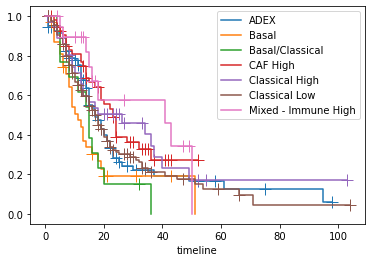

In [66]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
mask = ~pd.isnull(integrated.obs)['survival_time']
ft = integrated.obs.copy()[list(mask)]

for e in sorted(set(ft['cluster'])):
    kmf.fit(ft[ft['cluster']==e]['survival_time'],
            ft[ft['cluster']==e]['status']==2,
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

In [19]:
combined

,assignment_pvalue,ecotype,survival_time,censor,dataset
TCGA_2J_AABT_01A_11R_A41B_07,0.000436,E1,11.0,1,tcga
TCGA_HZ_A4BH_01A_11R_A26U_07,0.036861,E1,7.0,1,tcga
TCGA_3A_A9IX_01A_11R_A41B_07,0.011164,E1,35.0,1,tcga
TCGA_XN_A8T5_01A_12R_A36G_07,0.000001,E1,25.0,1,tcga
TCGA_HZ_8519_01A_11R_2404_07,0.000964,E1,16.0,1,tcga
...,...,...,...,...,...
T_11_02_A148a,0.000057,E5,21.0,2,kirby
T_04_04_A207b,0.028475,E6,22.0,2,kirby
T_05_03_A215c,0.011775,E6,15.0,2,kirby
T_06_11_A299b,0.048139,E6,27.0,2,kirby


In [20]:
ds = ['denovo_discovery', 'bulk_recovery_bailey', 'bulk_recovery_moffit', 'bulk_recovery_kirby']
large = None
for d in ds:
    dataset = d.split('_')[-1] if d != 'denovo_discovery' else 'tcga'
    if d != 'denovo_discovery':
        e = pd.read_csv(f'../data/ecotyper/results/{d}/{dataset}/Malignant/state_abundances.txt', sep='\t')
    else:
        e = pd.read_csv(f'../data/ecotyper/results/{d}/Malignant/state_abundances.txt', sep='\t')
    e = e.transpose()
    e['dataset'] = dataset
    if large is None:
        large = e
    else:
        large = pd.concat((large, e))
large

,S01,S02,S03,S04,S05,dataset
TCGA_OE_A75W_01A_12R_A32O_07,1.870591e-15,1.000000e+00,1.870591e-15,1.870591e-15,1.870591e-15,tcga
TCGA_2J_AABT_01A_11R_A41B_07,2.443180e-15,2.443180e-15,8.836779e-02,7.441624e-02,1.869281e-01,tcga
TCGA_IB_7886_01A_11R_2156_07,2.247507e-15,2.247507e-15,7.467957e-01,4.497574e-12,2.247507e-15,tcga
TCGA_IB_AAUU_01A_11R_A37L_07,2.231055e-15,3.470668e-02,4.249288e-01,2.477501e-01,2.926144e-01,tcga
TCGA_2J_AAB6_01A_11R_A41B_07,3.489073e-01,6.416283e-04,1.796297e-15,1.796297e-15,1.796297e-15,tcga
...,...,...,...,...,...,...
T_11_02_A171a_2,3.960663e-03,3.150461e-11,4.630152e-03,3.081409e-15,4.919835e-02,kirby
T_11_04_A026b,3.467565e-15,7.639032e-06,1.478276e-01,1.488872e-01,1.553184e-01,kirby
T_11_05_A018b,8.997434e-03,4.053723e-02,3.788588e-01,1.905203e-01,3.810862e-01,kirby
T_11_06_A011a,2.124475e-01,9.285418e-02,3.073589e-02,7.246253e-11,1.978764e-01,kirby


In [21]:
large['survival_time'] = [combined.loc[x, 'survival_time'] if x in combined.index else np.nan
                          for x in large.index.to_list()]
large['censor'] = [combined.loc[x, 'censor'] - 1 if x in combined.index else np.nan
                          for x in large.index.to_list()]
large = large[np.sum(pd.isnull(large.values), axis=1).flatten() < 1]
state_cols = [c for c in large.columns if 'S0' in c]
large['State'] = [state_cols[i] for i in np.argmax(large[state_cols].values, axis=1).flatten()]
large

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,S01,S02,S03,S04,S05,dataset,survival_time,censor,State
TCGA_OE_A75W_01A_12R_A32O_07,1.870591e-15,1.000000e+00,1.870591e-15,1.870591e-15,1.870591e-15,tcga,9.0,1.0,S02
TCGA_2J_AABT_01A_11R_A41B_07,2.443180e-15,2.443180e-15,8.836779e-02,7.441624e-02,1.869281e-01,tcga,11.0,0.0,S05
TCGA_IB_7886_01A_11R_2156_07,2.247507e-15,2.247507e-15,7.467957e-01,4.497574e-12,2.247507e-15,tcga,5.0,1.0,S03
TCGA_IB_AAUU_01A_11R_A37L_07,2.231055e-15,3.470668e-02,4.249288e-01,2.477501e-01,2.926144e-01,tcga,9.0,0.0,S03
TCGA_2J_AAB6_01A_11R_A41B_07,3.489073e-01,6.416283e-04,1.796297e-15,1.796297e-15,1.796297e-15,tcga,10.0,1.0,S01
...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,2.683709e-15,1.392683e-01,5.423820e-01,1.784887e-01,1.398609e-01,kirby,21.0,1.0,S03
T_11_04_A026b,3.467565e-15,7.639032e-06,1.478276e-01,1.488872e-01,1.553184e-01,kirby,51.0,0.0,S05
T_11_05_A018b,8.997434e-03,4.053723e-02,3.788588e-01,1.905203e-01,3.810862e-01,kirby,38.0,1.0,S05
T_11_06_A011a,2.124475e-01,9.285418e-02,3.073589e-02,7.246253e-11,1.978764e-01,kirby,11.0,1.0,S01


In [132]:
np.sum(pd.isnull(large.values))

0

In [140]:
from lifelines import CoxPHFitter
result = None
cs = [f'S0{x}' for x in range(1, 6)]
for community in cs:
    df = large[['survival_time', 'censor', community]].copy()
    cph = CoxPHFitter()
    cph.fit(df, duration_col='survival_time', event_col='censor')
    r = cph.summary[['coef', 'z', 'p', '-log2(p)']]
    if result is None:
        result = r
    else:
        result = pd.concat((result, r))
result
    

,coef,z,p,-log2(p)
covariate,,,,
S01,0.989427,2.846009,0.004427,7.819423
S02,0.279962,0.566477,0.571069,0.808262
S03,0.192042,0.461214,0.644645,0.633423
S04,-0.280958,-0.594901,0.551910,0.857496
S05,-0.599269,-1.496136,0.134618,2.893054


In [141]:
source = result.sort_values('z')
source['Community'] = source.index.to_list()
c = alt.Chart(source).mark_bar().encode(
    y=alt.Y('Community', sort='-color'),
    x=alt.X('-log2(p)'),
    color=alt.Color('z', scale=alt.Scale(scheme='redblue', domain=[-2.5, 2.5]))
)
line = alt.Chart(pd.DataFrame({'x': [4.32]})).mark_rule(color='gray', strokeDash=[4,1]).encode(x='x')

c + line

alt.LayerChart(...)

In [148]:
# limit to tumor centric types
keep = ['Basal', 'Basal/Classical', 'ADEX', 'Classical Low', 'Classical High']
source = get_overlap_matrix(large, integrated, meta_key='State')
source = source[[True if x in keep else False for x in source['cluster']]]
alt.Chart(source).mark_circle().encode(
    x=alt.X('State'),
    y=alt.Y('cluster', sort=keep),
    size=alt.Size('similarity metric:Q')
)

alt.Chart(...)

In [170]:
s = s
l = large.copy()
l.index = [x[:12].replace('_', '-') if 'TCGA' in x else x for x in l.index]
# print(len([x for x in l.index.to_list() if l in integrated.obs.index]))
cts = ['Malignant - Basal', 'Malignant - Mixed', 'Malignant - ADEX',
       'Malignant - Classical Low', 'Malignant - Classical High']
data = []
for ct in cts:
    overlap = sorted(set(l.index).intersection(set(integrated.obs.index)))
    xs = integrated[overlap, ct].X.flatten()
    ys = l.loc[overlap][s].to_list()
    c, p = spearmanr(xs, ys)
    data.append([s, ct, c, p, -np.log2(p)])
pd.DataFrame(data=data, columns=['State', 'cluster', 'correlation', 'p-value', '-log2(p)'])

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,State,cluster,correlation,p-value,-log2(p)
0,S01,Malignant - Basal,0.600231,6.715000e-33,106.876240
1,S01,Malignant - Mixed,-0.172589,1.881594e-03,9.053829
2,S01,Malignant - ADEX,-0.003766,9.463260e-01,0.079591
3,S01,Malignant - Classical Low,0.254766,3.648419e-06,18.064297
4,S01,Malignant - Classical High,-0.418716,4.230649e-15,47.748043


In [174]:
ss = [f'S0{x}' for x in range(1, 6)]
l = large.copy()
l.index = [x[:12].replace('_', '-') if 'TCGA' in x else x for x in l.index]
# print(len([x for x in l.index.to_list() if l in integrated.obs.index]))
cts = ['Malignant - Basal', 'Malignant - Mixed', 'Malignant - ADEX',
       'Malignant - Classical Low', 'Malignant - Classical High']
data = []
for s in ss:
    for ct in cts:
        overlap = sorted(set(l.index).intersection(set(integrated.obs.index)))
        xs = integrated[overlap, ct].X.flatten()
        ys = l.loc[overlap][s].to_list()
        c, p = spearmanr(xs, ys)
        data.append([s, ct, c, p, -np.log2(p)])
source = pd.DataFrame(data=data, columns=['State', 'cluster', 'correlation', 'p-value', '-log2(p)'])
source

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,State,cluster,correlation,p-value,-log2(p)
0,S01,Malignant - Basal,0.600231,6.715000e-33,106.876240
1,S01,Malignant - Mixed,-0.172589,1.881594e-03,9.053829
2,S01,Malignant - ADEX,-0.003766,9.463260e-01,0.079591
3,S01,Malignant - Classical Low,0.254766,3.648419e-06,18.064297
4,S01,Malignant - Classical High,-0.418716,4.230649e-15,47.748043
5,S02,Malignant - Basal,0.093584,9.365059e-02,3.416568
6,S02,Malignant - Mixed,0.363774,1.645816e-11,35.822406
7,S02,Malignant - ADEX,0.043339,4.383255e-01,1.189925
8,S02,Malignant - Classical Low,0.259400,2.385715e-06,18.677147
9,S02,Malignant - Classical High,0.241090,1.219542e-05,16.323301


In [185]:
cts = ['Malignant - Basal', 'Malignant - Mixed', 'Malignant - Classical Low', 'Malignant - ADEX', 'Malignant - Classical High']

# limit to tumor centric types
alt.Chart(source).mark_rect().encode(
    x=alt.X('State', sort=ss),
    y=alt.Y('cluster', sort=cts),
    color=alt.Color('correlation:Q', scale=alt.Scale(scheme='purpleorange', domain=[.7, -.7]))
)

alt.Chart(...)

In [183]:
ss

['S01', 'S02', 'S03', 'S04', 'S05']

In [57]:
def get_ecotyper_df(cell_type, combined, ds=None):
    if ds is None:
        ds = ['denovo_discovery', 'bulk_recovery_bailey', 'bulk_recovery_moffit', 'bulk_recovery_kirby']
    large = None
    for d in ds:
        dataset = d.split('_')[-1] if d != 'denovo_discovery' else 'tcga'
        if d != 'denovo_discovery':
            e = pd.read_csv(f'../data/ecotyper/results/{d}/{dataset}/{cell_type}/state_abundances.txt', sep='\t')
        else:
            e = pd.read_csv(f'../data/ecotyper/results/{d}/{cell_type}/state_abundances.txt', sep='\t')
        e = e.transpose()
        e['dataset'] = dataset
        if large is None:
            large = e
        else:
            large = pd.concat((large, e))
            

    large['survival_time'] = [combined.loc[x, 'survival_time'] if x in combined.index else np.nan
                          for x in large.index.to_list()]
    large['censor'] = [combined.loc[x, 'censor'] - 1 if x in combined.index else np.nan
                              for x in large.index.to_list()]
    large = large[np.sum(pd.isnull(large.values), axis=1).flatten() < 1]
    state_cols = [c for c in large.columns if 'S0' in c]
    large['State'] = [state_cols[i] for i in np.argmax(large[state_cols].values, axis=1).flatten()]


    return large

In [56]:
ds = ['denovo_discovery', 'bulk_recovery_bailey', 'bulk_recovery_moffit', 'bulk_recovery_kirby']
large = None
for d in ds:
    dataset = d.split('_')[-1] if d != 'denovo_discovery' else 'tcga'
    if d != 'denovo_discovery':
        e = pd.read_csv(f'../data/ecotyper/results/{d}/{dataset}/CD8.T.cell/state_abundances.txt', sep='\t')
    else:
        e = pd.read_csv(f'../data/ecotyper/results/{d}/CD8.T.cell/state_abundances.txt', sep='\t')
    e = e.transpose()
    e['dataset'] = dataset
    if large is None:
        large = e
    else:
        large = pd.concat((large, e))
large

,S01,S02,S03,dataset
TCGA_OE_A75W_01A_12R_A32O_07,9.070696e-02,5.446537e-01,2.872844e-15,tcga
TCGA_2J_AABT_01A_11R_A41B_07,3.232644e-01,3.408250e-15,3.408250e-15,tcga
TCGA_IB_7886_01A_11R_2156_07,1.082692e-01,9.766980e-02,6.236753e-01,tcga
TCGA_IB_AAUU_01A_11R_A37L_07,5.116097e-02,1.869499e-01,2.845515e-01,tcga
TCGA_2J_AAB6_01A_11R_A41B_07,2.860363e-15,5.100305e-01,2.708994e-01,tcga
...,...,...,...,...
T_11_02_A171a_2,1.716784e-01,3.925728e-15,1.463365e-01,kirby
T_11_04_A026b,4.596190e-01,4.016061e-01,1.309880e-01,kirby
T_11_05_A018b,1.097992e-01,3.297107e-01,1.429163e-01,kirby
T_11_06_A011a,4.818242e-01,3.924164e-01,1.257595e-01,kirby


In [57]:
large['survival_time'] = [combined.loc[x, 'survival_time'] if x in combined.index else np.nan
                          for x in large.index.to_list()]
large['censor'] = [combined.loc[x, 'censor'] - 1 if x in combined.index else np.nan
                          for x in large.index.to_list()]
large = large[np.sum(pd.isnull(large.values), axis=1).flatten() < 1]
state_cols = [c for c in large.columns if 'S0' in c]
large['State'] = [state_cols[i] for i in np.argmax(large[state_cols].values, axis=1).flatten()]
large

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,S01,S02,S03,dataset,survival_time,censor,State
TCGA_OE_A75W_01A_12R_A32O_07,9.070696e-02,5.446537e-01,2.872844e-15,tcga,9.0,1.0,S02
TCGA_2J_AABT_01A_11R_A41B_07,3.232644e-01,3.408250e-15,3.408250e-15,tcga,11.0,0.0,S01
TCGA_IB_7886_01A_11R_2156_07,1.082692e-01,9.766980e-02,6.236753e-01,tcga,5.0,1.0,S03
TCGA_IB_AAUU_01A_11R_A37L_07,5.116097e-02,1.869499e-01,2.845515e-01,tcga,9.0,0.0,S03
TCGA_2J_AAB6_01A_11R_A41B_07,2.860363e-15,5.100305e-01,2.708994e-01,tcga,10.0,1.0,S02
...,...,...,...,...,...,...,...
T_11_02_A148a,1.157052e-02,4.500006e-01,3.919743e-01,kirby,21.0,1.0,S02
T_11_04_A026b,4.596190e-01,4.016061e-01,1.309880e-01,kirby,51.0,0.0,S01
T_11_05_A018b,1.097992e-01,3.297107e-01,1.429163e-01,kirby,38.0,1.0,S02
T_11_06_A011a,4.818242e-01,3.924164e-01,1.257595e-01,kirby,11.0,1.0,S01


In [58]:
# limit to tumor centric types
import altair as alt
from lifelines import CoxPHFitter
keep = ['Basal', 'Basal/Classical', 'ADEX', 'Classical Low', 'Classical High']
source = get_overlap_matrix(large, integrated, meta_key='State')
source = source[[True if x in keep else False for x in source['cluster']]]
alt.Chart(source).mark_circle().encode(
    x=alt.X('State'),
    y=alt.Y('cluster', sort=keep),
    size=alt.Size('similarity metric:Q')
)

alt.Chart(...)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.X` of view, copying.


<AxesSubplot:>

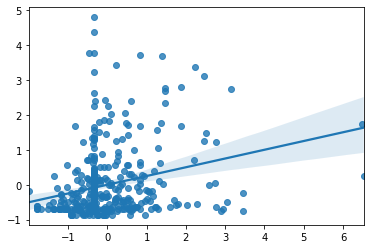

In [80]:
sns.regplot(x=integrated[:, 'CD8_T_cell_-_exausted'].X.flatten(),
            y=integrated[:, 'Malignant - Basal'].X.flatten())


In [82]:
from scipy.stats import spearmanr
ss = [f'S0{x}' for x in range(1, 4)]
l = large.copy()
l.index = [x[:12].replace('_', '-') if 'TCGA' in x else x for x in l.index]
# print(len([x for x in l.index.to_list() if l in integrated.obs.index]))
cts = ['Malignant - Basal', 'Malignant - Mixed', 'Malignant - ADEX',
       'Malignant - Classical Low', 'Malignant - Classical High']
data = []
for s in ss:
    for ct in cts:
        overlap = sorted(set(l.index).intersection(set(integrated.obs.index)))
        xs = integrated[overlap, ct].X.flatten()
        ys = l.loc[overlap][s].to_list()
        c, p = spearmanr(xs, ys)
        data.append([s, ct, c, p, -np.log2(p)])
source = pd.DataFrame(data=data, columns=['State', 'cluster', 'correlation', 'p-value', '-log2(p)'])
source

/diskmnt/Projects/Users/estorrs/miniconda3/envs/seurat_v4/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,State,cluster,correlation,p-value,-log2(p)
0,S01,Malignant - Basal,-0.347178,1.493899e-10,32.640198
1,S01,Malignant - Mixed,-0.367993,9.201600e-12,36.661252
2,S01,Malignant - ADEX,0.065343,2.423133e-01,2.045055
3,S01,Malignant - Classical Low,-0.325779,2.133785e-09,28.803938
4,S01,Malignant - Classical High,-0.079888,1.526455e-01,2.711743
5,S02,Malignant - Basal,0.495657,2.285982e-21,68.567676
6,S02,Malignant - Mixed,0.487292,1.317146e-20,66.041147
7,S02,Malignant - ADEX,-0.209147,1.566313e-04,12.640340
8,S02,Malignant - Classical Low,0.113413,4.197502e-02,4.574325
9,S02,Malignant - Classical High,-0.158965,4.241190e-03,7.881315


In [89]:
cts = ['Malignant - Basal', 'Malignant - Mixed', 'Malignant - Classical Low', 'Malignant - Classical High',
      'Malignant - ADEX']

# limit to tumor centric types
alt.Chart(source).mark_rect().encode(
    x=alt.X('State', sort=ss),
    y=alt.Y('cluster', sort=cts),
    color=alt.Color('correlation:Q', scale=alt.Scale(scheme='purpleorange', domain=[.7, -.7]))
)

alt.Chart(...)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


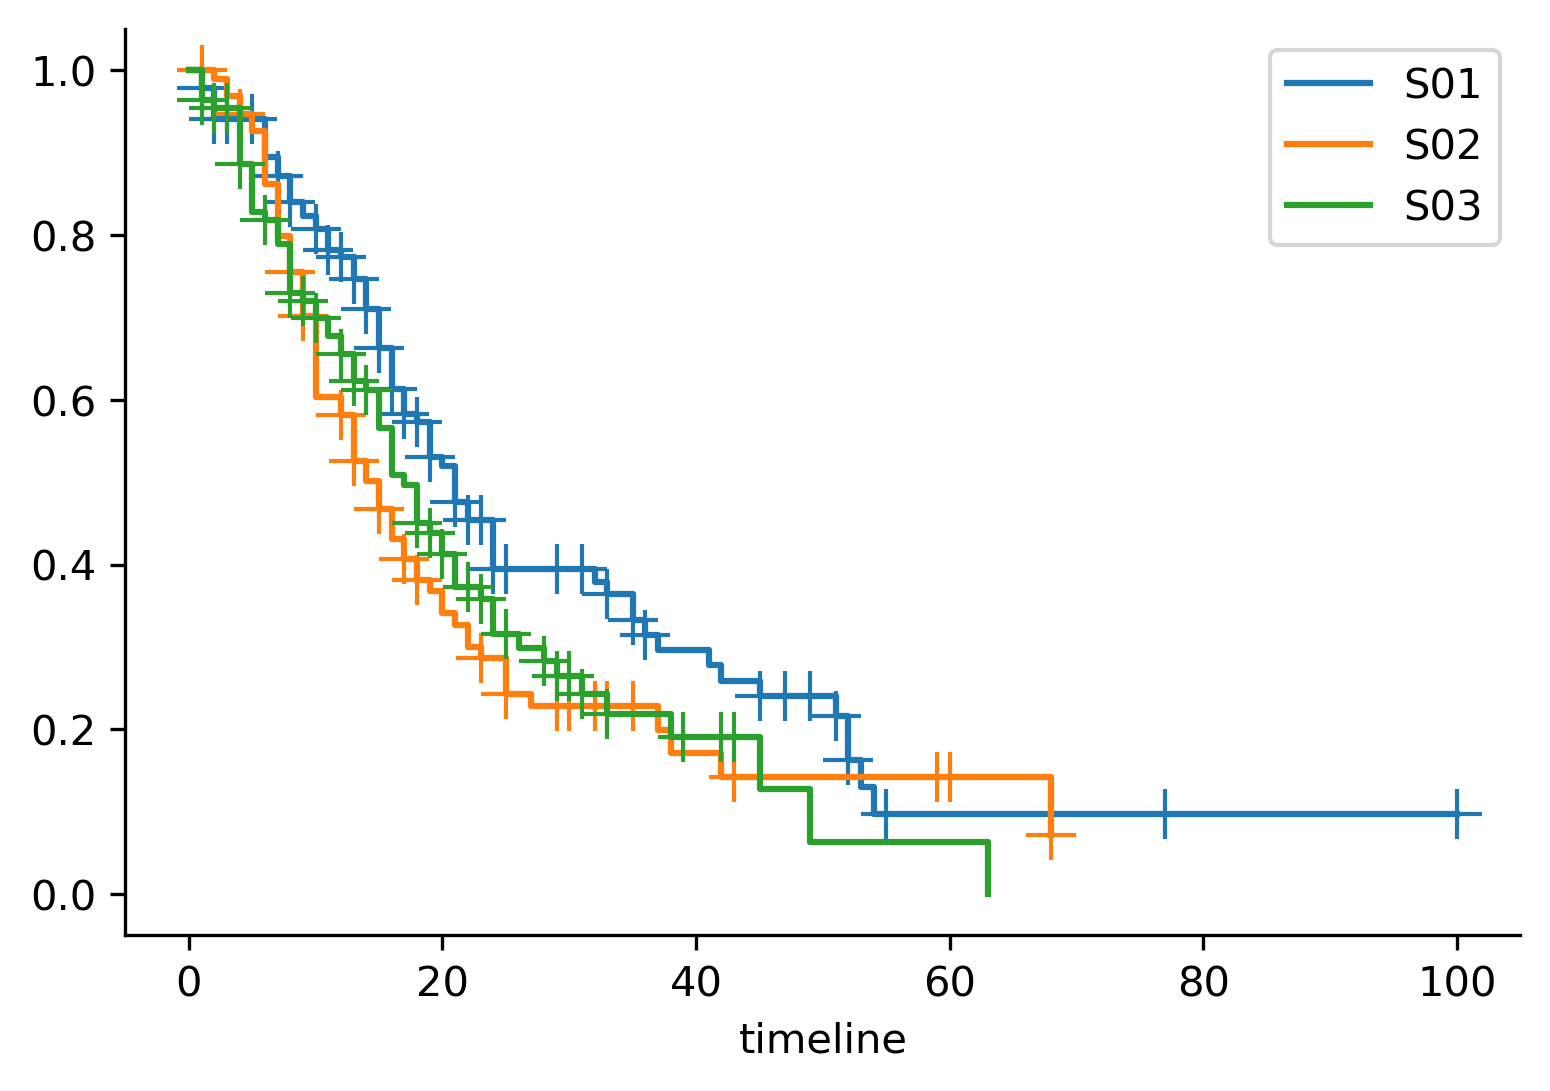

In [110]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
cd8_df = get_ecotyper_df('CD8.T.cell', combined)
ft = cd8_df.copy()
# ft = ft[ft['survival_time']<12 * 5]

for e in sorted(set(ft['State'])):
    kmf.fit(ft[ft['State']==e]['survival_time'],
            ft[ft['State']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(os.path.join(figdir, 'cd8_ecotyper_km.pdf'))

In [91]:
df = pd.read_csv('../data/ecotyper/results/denovo_discovery/CD8.T.cell/gene_info.txt', sep='\t')
df

,Gene,IS01,IS02,IS03,IS04,IS05,State,MaxFC,InitialState
SH2D1A,SH2D1A,-0.137263,-0.363214,-1.035431,1.727172,-0.148235,S01,1.727172,IS04
AC243960,AC243960,-0.148461,-0.109804,-0.909496,1.723809,-0.516182,S01,1.723809,IS04
CD28,CD28,0.079854,-0.673154,-1.070901,1.682430,0.003241,S01,1.682430,IS04
LINC00861,LINC00861,0.014843,-0.225026,-0.865906,1.678200,-0.581588,S01,1.678200,IS04
ITK,ITK,0.019809,-0.702542,-0.810925,1.674511,-0.211798,S01,1.674511,IS04
...,...,...,...,...,...,...,...,...,...
C11orf97,C11orf97,0.175674,0.028753,-0.024355,-0.338312,0.187763,S03,0.187763,IS05
MOB4,MOB4,-0.156956,-0.110348,0.097889,-0.025809,0.172516,S03,0.172516,IS05
GPR19,GPR19,0.048734,-0.053333,-0.121892,-0.017816,0.164334,S03,0.164334,IS05
CEP83,CEP83,-0.087628,0.016277,0.047342,-0.097513,0.123554,S03,0.123554,IS05


In [94]:
for x in df[df['State']=='S01'].index[:20]: print(x)

SH2D1A
AC243960
CD28
LINC00861
ITK
TRAT1
IL24
FYN
CCR7
GZMK
TRBV2
CD3D
STAT4
FCRL3
TBC1D10C
SELL
TRBV3_1
ARRDC5
RTP5
CCL19


In [100]:
pathways = pd.read_csv('../results/figures/ecotyper_v1/cd8_t_cell_s01_pathway.txt', sep='\t')
pathways['-log10(FDR)'] = [-np.log10(x) for x in pathways['q-value FDR B&H']]
pathways['Genes in pathway'] = pathways['Hit Count in Query List'].to_list()
# pathways['NK'] = go_pathways
pathways

,Category,ID,Name,Source,p-value,q-value Bonferroni,q-value FDR B&H,q-value FDR B&Y,Hit Count in Query List,Hit Count in Genome,Hit in Query List,-log10(FDR),Genes in pathway
0,GO: Biological Process,GO:0050851,antigen receptor-mediated signaling pathway,,1.200000e-10,1.264000e-07,1.264000e-07,9.526000e-07,8,338,"SH2D1A,TRAT1,FYN,CD28,CD3D,CCR7,ITK,FCRL3",6.898253,8
1,GO: Biological Process,GO:0050852,T cell receptor signaling pathway,,2.824000e-10,2.974000e-07,1.487000e-07,1.121000e-06,7,219,"SH2D1A,TRAT1,FYN,CD28,CD3D,CCR7,ITK",6.827689,7
2,GO: Biological Process,GO:0050776,regulation of immune response,,2.213000e-09,2.330000e-06,4.828000e-07,3.639000e-06,10,1066,"SELL,SH2D1A,TRAT1,FYN,CD28,CD3D,CCR7,ITK,FCRL3...",6.316233,10
3,GO: Biological Process,GO:0002429,immune response-activating cell surface recept...,,2.568000e-09,2.704000e-06,4.828000e-07,3.639000e-06,8,498,"SH2D1A,TRAT1,FYN,CD28,CD3D,CCR7,ITK,FCRL3",6.316233,8
4,GO: Biological Process,GO:0002757,immune response-activating signal transduction,,2.608000e-09,2.747000e-06,4.828000e-07,3.639000e-06,8,499,"SH2D1A,TRAT1,FYN,CD28,CD3D,CCR7,ITK,FCRL3",6.316233,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,GO: Biological Process,GO:0010310,regulation of hydrogen peroxide metabolic process,,1.918000e-02,1.000000e+00,4.796000e-02,3.615000e-01,1,23,FYN,1.319121,1
421,GO: Biological Process,GO:0008037,cell recognition,,1.960000e-02,1.000000e+00,4.890000e-02,3.685000e-01,2,259,"CCR7,CCL19",1.310691,2
422,GO: Biological Process,GO:0050966,detection of mechanical stimulus involved in s...,,2.000000e-02,1.000000e+00,4.956000e-02,3.735000e-01,1,24,FYN,1.304869,1
423,GO: Biological Process,GO:0002922,positive regulation of humoral immune response,,2.000000e-02,1.000000e+00,4.956000e-02,3.735000e-01,1,24,CCR7,1.304869,1


In [111]:
chart = alt.Chart(pathways.iloc[:10], title='S01')
chart = chart.mark_bar().encode(
    y=alt.Y(f'Name:N', axis=alt.Axis(title=None), sort='-x'),
    x=alt.X(f'Genes in pathway:Q', scale=alt.Scale(zero=False), axis=alt.Axis(grid=True),
           title='Genes in pathway'),
    color=alt.Color(f'-log10(FDR):Q', scale=alt.Scale(zero=True, scheme='oranges')),
)
line = alt.Chart(pd.DataFrame({'x': [4.32]})).mark_rule(color='gray', strokeDash=[4,1]).encode(x='x')

chart + line

alt.LayerChart(...)

In [112]:
cytotrace = pd.read_csv('/diskmnt/Projects/Users/estorrs/sc_pdac/data/cytotrace/05242021/correlations.txt',
                       sep='\t')
cytotrace

,x
A1BG,-0.023803
A1CF,-0.020353
A2M,-0.232380
A2ML1,0.055582
A4GALT,0.140970
...,...
ZXDB,0.055276
ZXDC,0.097171
ZYG11B,0.056793
ZYX,0.142694


In [113]:
df = pd.read_csv('../data/ecotyper/results/denovo_discovery/Malignant/gene_info.txt', sep='\t')
df

,Gene,IS01,IS02,IS03,IS04,IS05,IS06,IS07,IS08,IS09,State,MaxFC,InitialState
SLC2A1,SLC2A1,1.215817,0.693607,-0.688734,-1.151332,0.309797,-0.401385,0.659495,-1.146586,-0.062392,S01,1.215817,IS01
MET,MET,1.201127,0.795739,0.069499,-1.052314,0.180044,-0.422645,0.443355,-1.066348,-0.701263,S01,1.201127,IS01
ALS2CL,ALS2CL,1.175305,-0.633699,-1.160384,-0.985548,0.852019,0.478783,0.050745,-0.929910,0.293362,S01,1.175305,IS01
KRT7_AS,KRT7_AS,1.154280,-0.283792,-0.965034,-0.944919,0.660723,0.352303,0.132865,-1.191521,0.298935,S01,1.154280,IS01
SLC16A3,SLC16A3,1.134240,0.655848,-0.948397,-0.718776,0.230198,0.025290,-0.251398,-0.861588,0.253202,S01,1.134240,IS01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTY14,TTTY14,-0.027262,-0.114876,-0.457775,-0.280861,0.275661,0.455292,0.205373,-0.466580,0.067854,S05,0.455292,IS06
ATXN7L3B,ATXN7L3B,-0.435936,-0.359098,0.279578,-0.724673,0.442976,0.451534,0.272581,0.235275,-0.431830,S05,0.451534,IS06
SSRP1,SSRP1,-1.365821,-0.210980,0.393614,0.200352,-0.012286,0.449521,0.209179,0.230856,0.379787,S05,0.449521,IS06
C2CD4C,C2CD4C,0.164320,0.001734,0.396715,-0.446339,0.080882,0.425357,-0.661352,-0.159041,0.081327,S05,0.425357,IS06


In [114]:
cytotrace.columns = ['cytotrace_corr']
df = pd.merge(df, cytotrace, left_index=True, right_index=True)
df

,Gene,IS01,IS02,IS03,IS04,IS05,IS06,IS07,IS08,IS09,State,MaxFC,InitialState,cytotrace_corr
SLC2A1,SLC2A1,1.215817,0.693607,-0.688734,-1.151332,0.309797,-0.401385,0.659495,-1.146586,-0.062392,S01,1.215817,IS01,0.450885
MET,MET,1.201127,0.795739,0.069499,-1.052314,0.180044,-0.422645,0.443355,-1.066348,-0.701263,S01,1.201127,IS01,0.353081
ALS2CL,ALS2CL,1.175305,-0.633699,-1.160384,-0.985548,0.852019,0.478783,0.050745,-0.929910,0.293362,S01,1.175305,IS01,0.139257
SLC16A3,SLC16A3,1.134240,0.655848,-0.948397,-0.718776,0.230198,0.025290,-0.251398,-0.861588,0.253202,S01,1.134240,IS01,0.338283
CAPS,CAPS,1.127470,-0.103400,-0.659016,-0.458409,-0.178673,0.249426,-0.154624,-0.524381,0.428809,S01,1.127470,IS01,0.282247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTY14,TTTY14,-0.027262,-0.114876,-0.457775,-0.280861,0.275661,0.455292,0.205373,-0.466580,0.067854,S05,0.455292,IS06,-0.021525
ATXN7L3B,ATXN7L3B,-0.435936,-0.359098,0.279578,-0.724673,0.442976,0.451534,0.272581,0.235275,-0.431830,S05,0.451534,IS06,0.078094
SSRP1,SSRP1,-1.365821,-0.210980,0.393614,0.200352,-0.012286,0.449521,0.209179,0.230856,0.379787,S05,0.449521,IS06,0.224566
C2CD4C,C2CD4C,0.164320,0.001734,0.396715,-0.446339,0.080882,0.425357,-0.661352,-0.159041,0.081327,S05,0.425357,IS06,0.001822


<AxesSubplot:xlabel='MaxFC', ylabel='cytotrace_corr'>

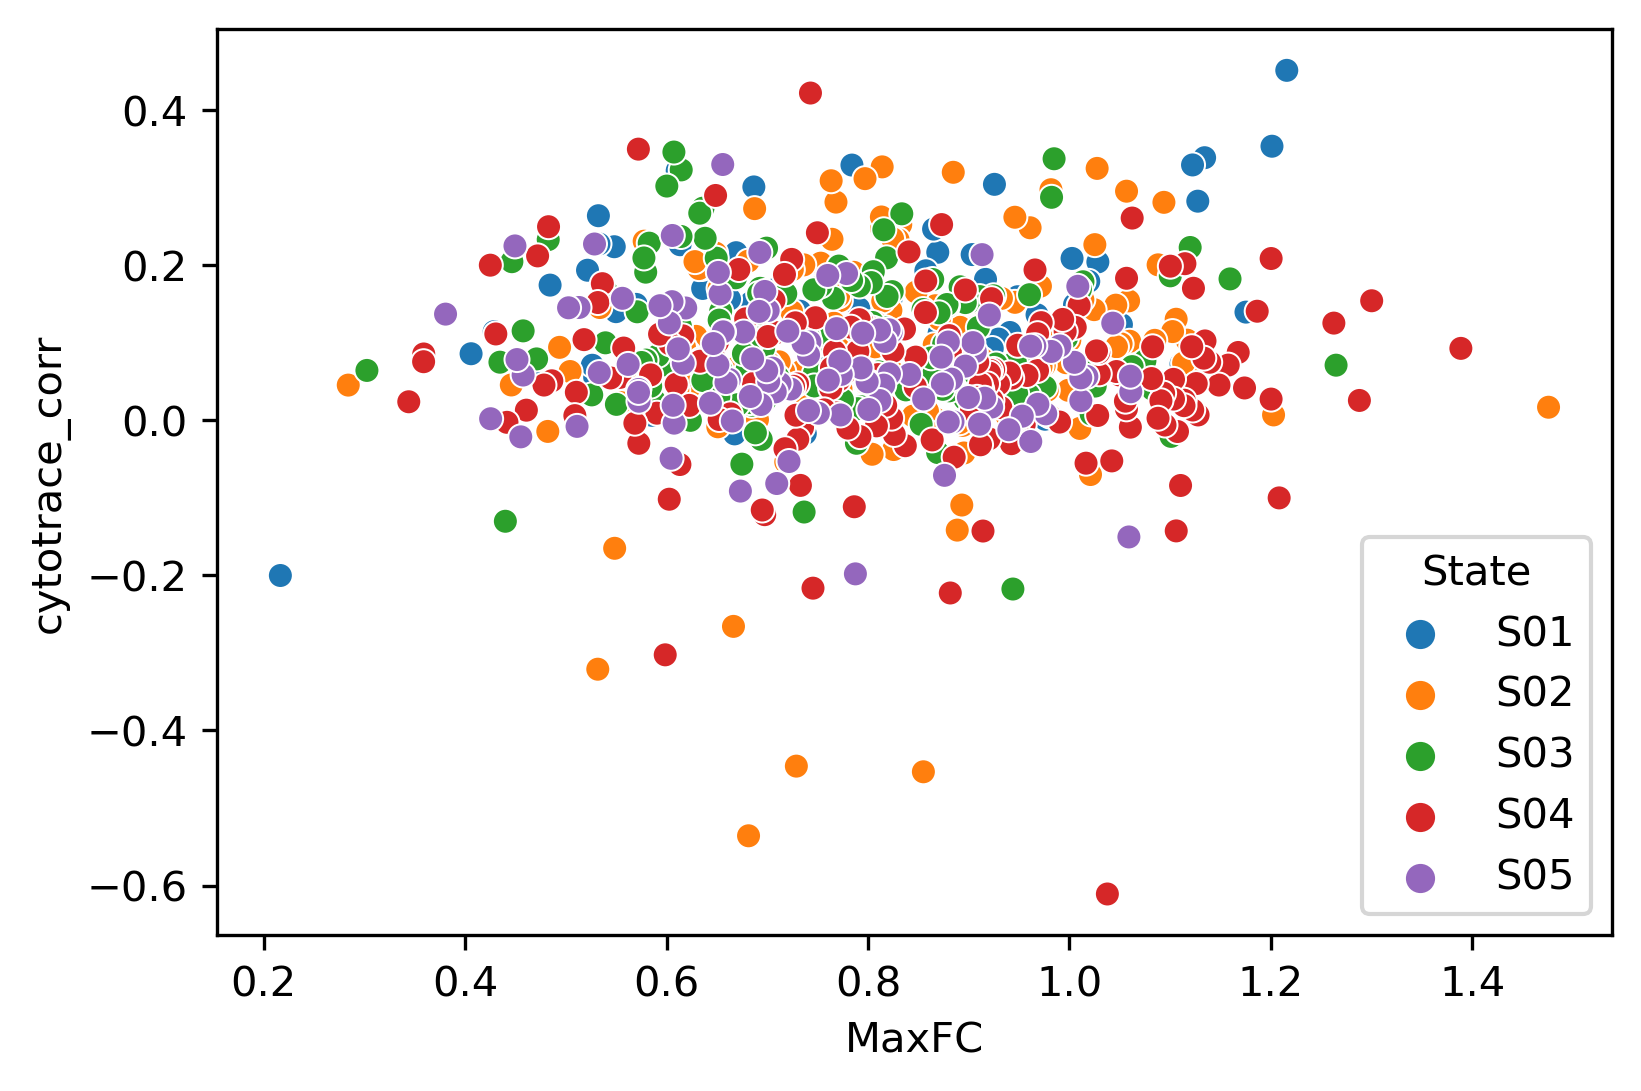

In [115]:
sns.scatterplot(data=df, x='MaxFC', y='cytotrace_corr', hue='State')

<AxesSubplot:xlabel='State', ylabel='cytotrace_corr'>

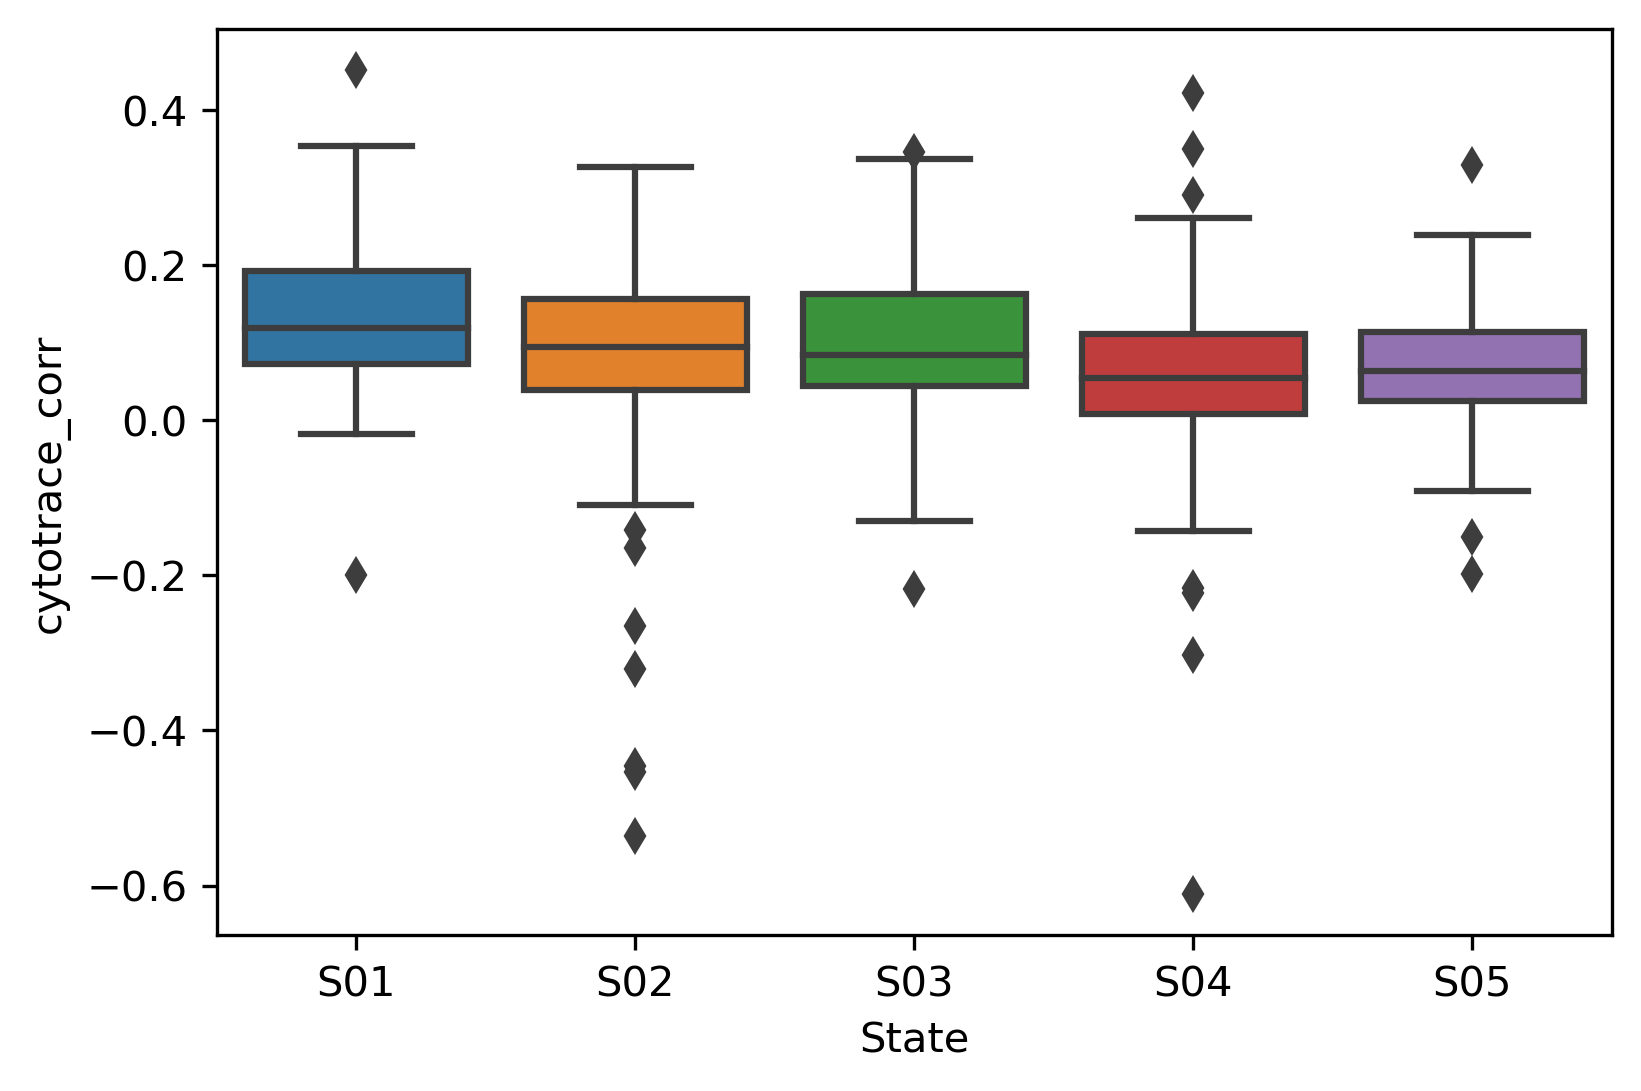

In [119]:
sns.boxplot(data=df, x='State', y='cytotrace_corr')

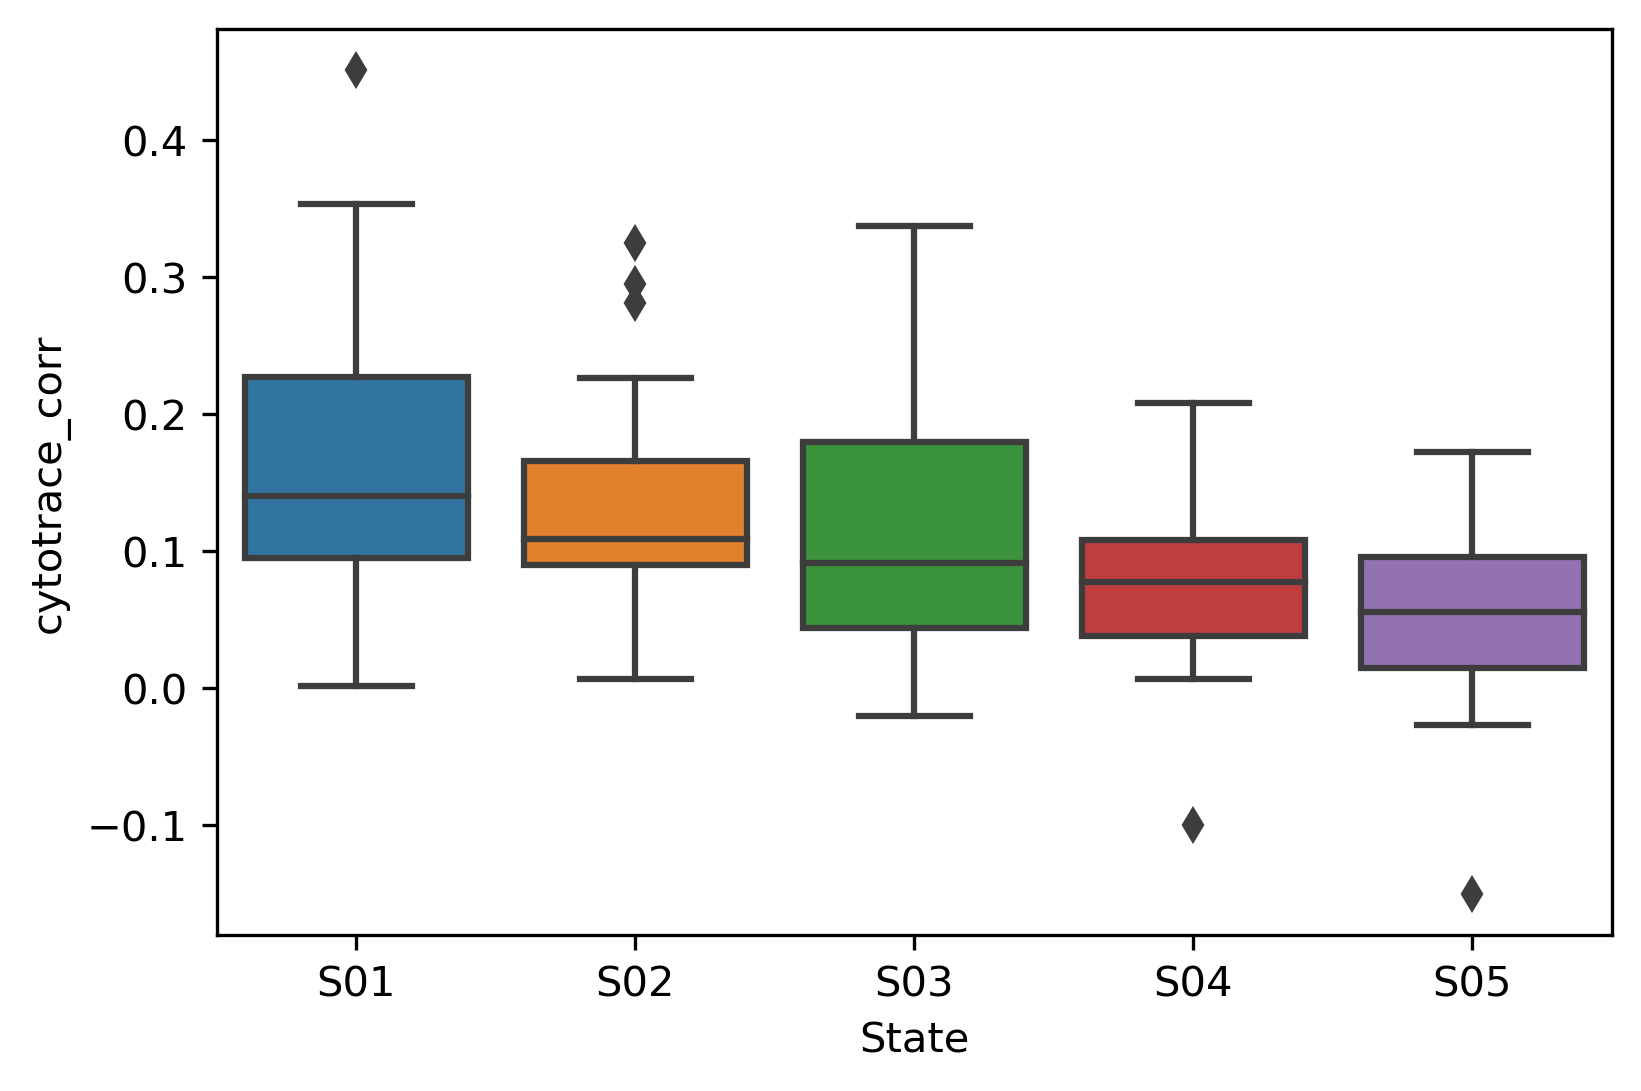

In [131]:
m = None
for s in sorted(set(df['State'])):
    f = df[df['State']==s]
    f = f.iloc[:20]
    if m is None:
        m = f
    else:
        m = pd.concat((m, f))
sns.boxplot(data=m, x='State', y='cytotrace_corr')
plt.savefig(os.path.join(figdir, 'malignant_cytotrace_corr_box.pdf'))

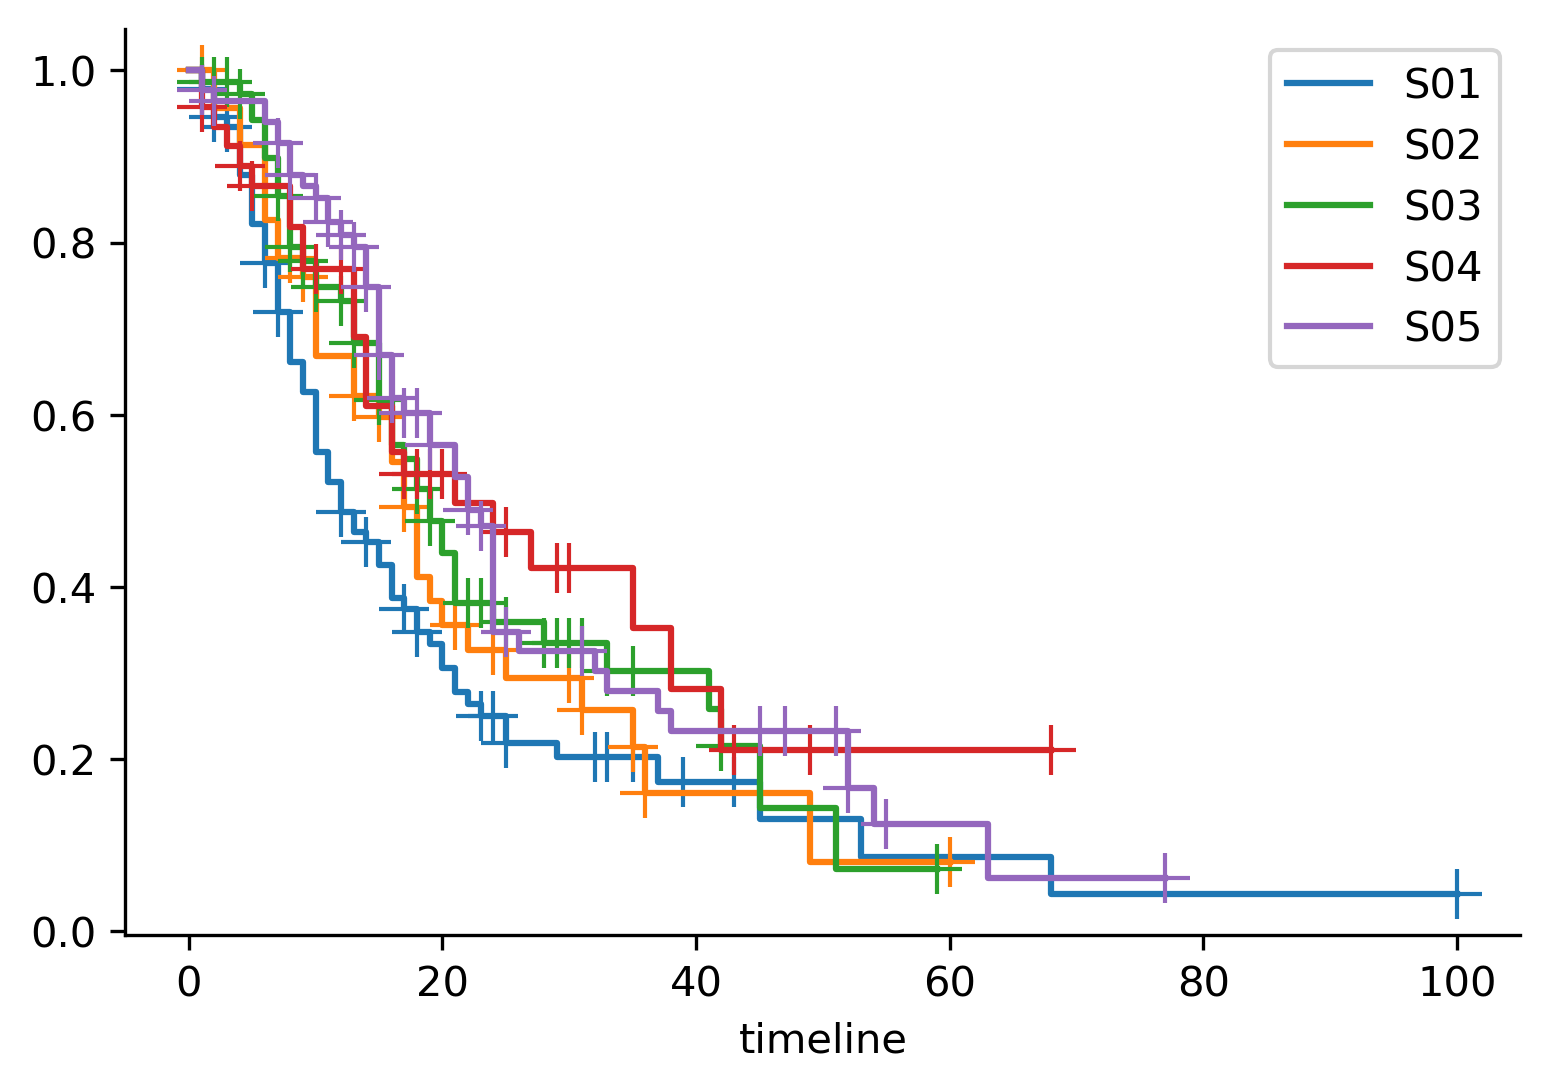

In [58]:
d = get_ecotyper_df('Malignant', combined)
ft = d.copy()

for e in sorted(set(ft['State'])):
    kmf.fit(ft[ft['State']==e]['survival_time'],
            ft[ft['State']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(os.path.join(figdir, 'malignant_ecotyper_km.pdf'))

In [59]:
d['fixed_id'] = [x[:12].replace('_', '-') if 'TCGA' in x else x for x in d.index]
d['community'] = [integrated.obs.loc[x, 'cluster'] if x in integrated.obs.index else None for x in d['fixed_id']]
d

,S01,S02,S03,S04,S05,dataset,survival_time,censor,State,fixed_id,community
TCGA_OE_A75W_01A_12R_A32O_07,1.870591e-15,1.000000e+00,1.870591e-15,1.870591e-15,1.870591e-15,tcga,9.0,1.0,S02,TCGA-OE-A75W,Classical Low
TCGA_2J_AABT_01A_11R_A41B_07,2.443180e-15,2.443180e-15,8.836779e-02,7.441624e-02,1.869281e-01,tcga,11.0,0.0,S05,TCGA-2J-AABT,Mixed - Immune High
TCGA_IB_7886_01A_11R_2156_07,2.247507e-15,2.247507e-15,7.467957e-01,4.497574e-12,2.247507e-15,tcga,5.0,1.0,S03,TCGA-IB-7886,Classical Low
TCGA_IB_AAUU_01A_11R_A37L_07,2.231055e-15,3.470668e-02,4.249288e-01,2.477501e-01,2.926144e-01,tcga,9.0,0.0,S03,TCGA-IB-AAUU,Classical Low
TCGA_2J_AAB6_01A_11R_A41B_07,3.489073e-01,6.416283e-04,1.796297e-15,1.796297e-15,1.796297e-15,tcga,10.0,1.0,S01,TCGA-2J-AAB6,Basal
...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,2.683709e-15,1.392683e-01,5.423820e-01,1.784887e-01,1.398609e-01,kirby,21.0,1.0,S03,T_11_02_A148a,Classical Low
T_11_04_A026b,3.467565e-15,7.639032e-06,1.478276e-01,1.488872e-01,1.553184e-01,kirby,51.0,0.0,S05,T_11_04_A026b,Mixed - Immune High
T_11_05_A018b,8.997434e-03,4.053723e-02,3.788588e-01,1.905203e-01,3.810862e-01,kirby,38.0,1.0,S05,T_11_05_A018b,Classical High
T_11_06_A011a,2.124475e-01,9.285418e-02,3.073589e-02,7.246253e-11,1.978764e-01,kirby,11.0,1.0,S01,T_11_06_A011a,Classical Low


In [60]:
set(d['community'])

{'ADEX',
 'Basal',
 'Basal/Classical',
 'CAF High',
 'Classical High',
 'Classical Low',
 'Mixed - Immune High',
 None}

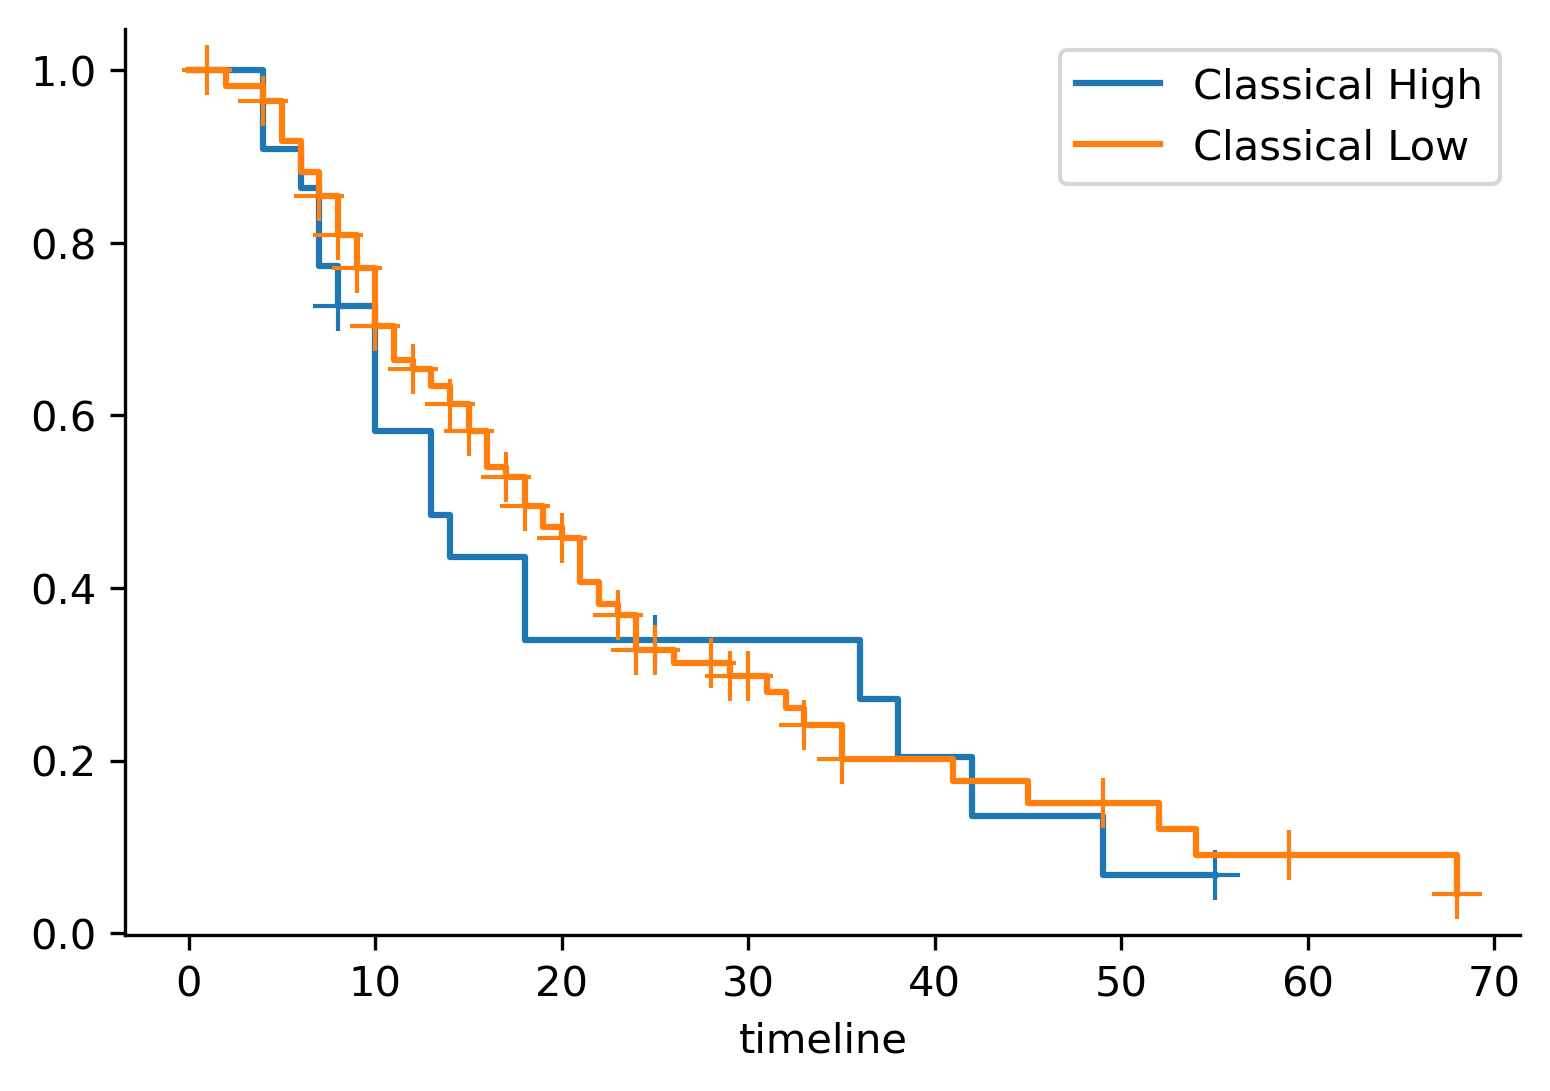

In [143]:
ft = d.copy()
ft = ft[[True if c in ['Classical Low', 'Classical High'] else False for c in ft['community']]]
for e in sorted(set(ft['community'])):
    kmf.fit(ft[ft['community']==e]['survival_time'],
            ft[ft['community']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(os.path.join(figdir, 'community_km.pdf'))

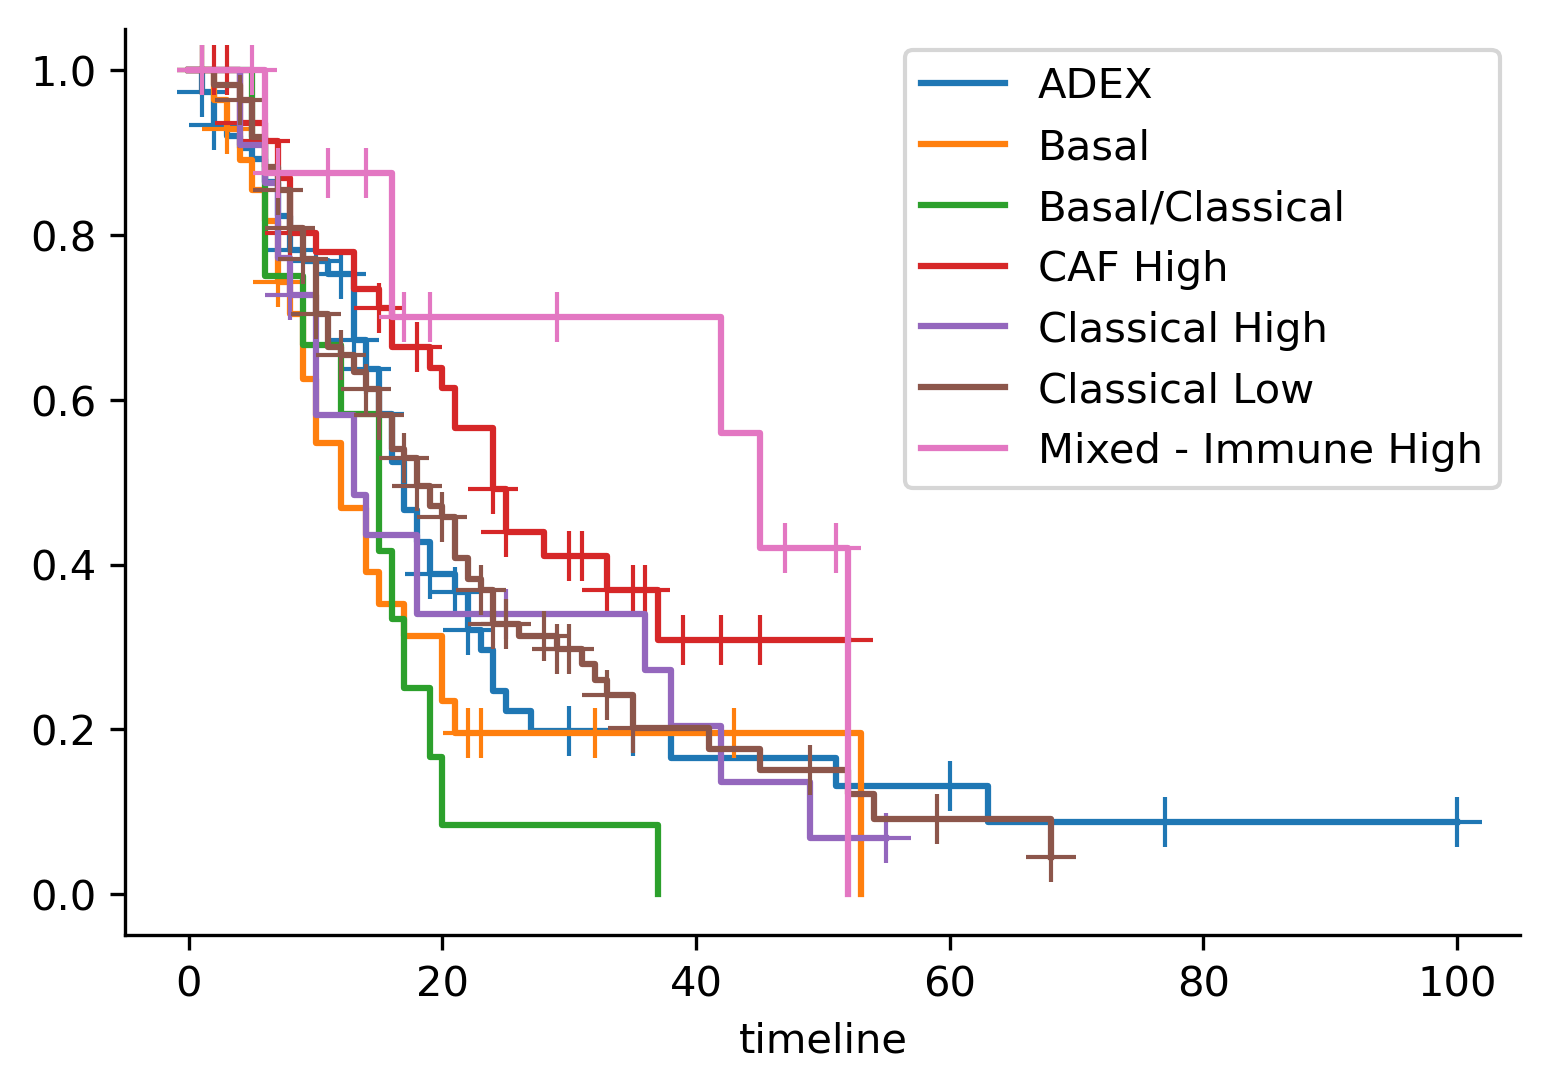

In [63]:
ft = d.copy()
# ft = ft[[True if c in ['Mixed - Immune High', 'CAF High'] else False for c in ft['community']]]
ft = ft[~pd.isnull(ft['community'])]
for e in sorted(set(ft['community'])):
    kmf.fit(ft[ft['community']==e]['survival_time'],
            ft[ft['community']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(os.path.join(figdir, 'stroma_community_km.pdf'))

In [65]:
ft

,S01,S02,S03,S04,S05,dataset,survival_time,censor,State,fixed_id,community
TCGA_OE_A75W_01A_12R_A32O_07,1.870591e-15,1.000000e+00,1.870591e-15,1.870591e-15,1.870591e-15,tcga,9.0,1.0,S02,TCGA-OE-A75W,Classical Low
TCGA_2J_AABT_01A_11R_A41B_07,2.443180e-15,2.443180e-15,8.836779e-02,7.441624e-02,1.869281e-01,tcga,11.0,0.0,S05,TCGA-2J-AABT,Mixed - Immune High
TCGA_IB_7886_01A_11R_2156_07,2.247507e-15,2.247507e-15,7.467957e-01,4.497574e-12,2.247507e-15,tcga,5.0,1.0,S03,TCGA-IB-7886,Classical Low
TCGA_IB_AAUU_01A_11R_A37L_07,2.231055e-15,3.470668e-02,4.249288e-01,2.477501e-01,2.926144e-01,tcga,9.0,0.0,S03,TCGA-IB-AAUU,Classical Low
TCGA_2J_AAB6_01A_11R_A41B_07,3.489073e-01,6.416283e-04,1.796297e-15,1.796297e-15,1.796297e-15,tcga,10.0,1.0,S01,TCGA-2J-AAB6,Basal
...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,2.683709e-15,1.392683e-01,5.423820e-01,1.784887e-01,1.398609e-01,kirby,21.0,1.0,S03,T_11_02_A148a,Classical Low
T_11_04_A026b,3.467565e-15,7.639032e-06,1.478276e-01,1.488872e-01,1.553184e-01,kirby,51.0,0.0,S05,T_11_04_A026b,Mixed - Immune High
T_11_05_A018b,8.997434e-03,4.053723e-02,3.788588e-01,1.905203e-01,3.810862e-01,kirby,38.0,1.0,S05,T_11_05_A018b,Classical High
T_11_06_A011a,2.124475e-01,9.285418e-02,3.073589e-02,7.246253e-11,1.978764e-01,kirby,11.0,1.0,S01,T_11_06_A011a,Classical Low


In [67]:
ft

,S01,S02,S03,S04,S05,dataset,survival_time,censor,State,fixed_id,community
TCGA_OE_A75W_01A_12R_A32O_07,1.870591e-15,1.000000e+00,1.870591e-15,1.870591e-15,1.870591e-15,tcga,9.0,1.0,S02,TCGA-OE-A75W,Classical Low
TCGA_2J_AABT_01A_11R_A41B_07,2.443180e-15,2.443180e-15,8.836779e-02,7.441624e-02,1.869281e-01,tcga,11.0,0.0,S05,TCGA-2J-AABT,Mixed - Immune High
TCGA_IB_7886_01A_11R_2156_07,2.247507e-15,2.247507e-15,7.467957e-01,4.497574e-12,2.247507e-15,tcga,5.0,1.0,S03,TCGA-IB-7886,Classical Low
TCGA_IB_AAUU_01A_11R_A37L_07,2.231055e-15,3.470668e-02,4.249288e-01,2.477501e-01,2.926144e-01,tcga,9.0,0.0,S03,TCGA-IB-AAUU,Classical Low
TCGA_2J_AAB6_01A_11R_A41B_07,3.489073e-01,6.416283e-04,1.796297e-15,1.796297e-15,1.796297e-15,tcga,10.0,1.0,S01,TCGA-2J-AAB6,Basal
...,...,...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,2.683709e-15,1.392683e-01,5.423820e-01,1.784887e-01,1.398609e-01,kirby,21.0,1.0,S03,T_11_02_A148a,Classical Low
T_11_04_A026b,3.467565e-15,7.639032e-06,1.478276e-01,1.488872e-01,1.553184e-01,kirby,51.0,0.0,S05,T_11_04_A026b,Mixed - Immune High
T_11_05_A018b,8.997434e-03,4.053723e-02,3.788588e-01,1.905203e-01,3.810862e-01,kirby,38.0,1.0,S05,T_11_05_A018b,Classical High
T_11_06_A011a,2.124475e-01,9.285418e-02,3.073589e-02,7.246253e-11,1.978764e-01,kirby,11.0,1.0,S01,T_11_06_A011a,Classical Low


In [69]:
c = combined.copy()
c = c.set_index('fixed_id')
c['community'] = [integrated.obs.loc[x, 'cluster'] if x in integrated.obs.index else None for x in combined['fixed_id']]
c


,assignment_pvalue,ecotype,survival_time,censor,dataset,community
fixed_id,,,,,,
TCGA-2J-AABT,0.000436,E1,11.0,1,tcga,Mixed - Immune High
TCGA-HZ-A4BH,0.036861,E1,7.0,1,tcga,Classical Low
TCGA-3A-A9IX,0.011164,E1,35.0,1,tcga,Classical Low
TCGA-XN-A8T5,0.000001,E1,25.0,1,tcga,CAF High
TCGA-HZ-8519,0.000964,E1,16.0,1,tcga,None
...,...,...,...,...,...,...
T_11_02_A148a,0.000057,E5,21.0,2,kirby,Classical Low
T_04_04_A207b,0.028475,E6,22.0,2,kirby,Classical Low
T_05_03_A215c,0.011775,E6,15.0,2,kirby,Classical Low


In [70]:
c.to_csv(os.path.join(figdir, 'community_ecotype_metadata.txt'), sep='\t')

In [75]:
source

,ecotype,cluster,similarity metric
0,E1,ADEX,0.192308
1,E1,Basal,0.214286
2,E1,Basal/Classical,0.153846
3,E1,CAF High,0.215686
4,E1,Classical High,0.000000
5,E1,Classical Low,0.157895
6,E1,Mixed - Immune High,0.555556
7,E2,ADEX,0.025641
8,E2,Basal,0.000000
9,E2,Basal/Classical,0.000000


In [83]:
# limit to tumor centric types
import altair as alt
from lifelines import CoxPHFitter
keep = ['Basal', 'Basal/Classical', 'ADEX', 'Classical Low', 'Classical High', 'CAF High', 'Mixed - Immune High']
es = ['E3', 'E6', 'E4', 'E5', 'E2', 'E1']
source = get_overlap_matrix(c, integrated, meta_key='ecotype')
source = source[[True if x in keep else False for x in source['cluster']]]
alt.Chart(source).mark_circle().encode(
    x=alt.X('ecotype', sort=es),
    y=alt.Y('cluster', sort=keep),
    size=alt.Size('similarity metric:Q')
)

alt.Chart(...)

In [87]:
# limit to tumor centric types
import altair as alt
from lifelines import CoxPHFitter
keep = ['Basal', 'Basal/Classical', 'ADEX', 'Classical Low', 'Classical High', 'CAF High', 'Mixed - Immune High']
es = ['E1']
source = get_overlap_matrix(c, integrated, meta_key='ecotype')
source = source[[True if x in keep else False for x in source['cluster']]]
source = source[[True if x in es else False for x in source['ecotype']]]
alt.Chart(source).mark_rect().encode(
    x=alt.X('ecotype', sort=es),
    y=alt.Y('cluster', sort=keep),
    color=alt.Color('similarity metric:Q', scale=alt.Scale(scheme='viridis'))
)

alt.Chart(...)

In [37]:
es = pd.read_csv('../data/ecotyper/results/denovo_discovery/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
es.index = [x[:12].replace('_', '-') for x in es.index]

bailey = pd.read_csv('../data/ecotyper/results/bulk_recovery_bailey/bailey/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
moffit = pd.read_csv('../data/ecotyper/results/bulk_recovery_moffit/moffit/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
kirby = pd.read_csv('../data/ecotyper/results/bulk_recovery_kirby/kirby/Ecotypes/ecotype_assignment.txt', sep='\t'
               ).set_index('ID')
es = pd.concat((es, bailey, moffit, kirby))
es

,MaxEcotype,AssignmentP,AssignmentQ,AssignedToEcotypeStates,Ecotype
TCGA-2J-AABT,E1,0.000436,0.002166,True,E1
TCGA-HZ-A4BH,E1,0.036861,0.052307,True,E1
TCGA-3A-A9IX,E1,0.011164,0.020287,True,E1
TCGA-XN-A8T5,E1,0.000001,0.000022,True,E1
TCGA-HZ-8519,E1,0.000964,0.003990,True,E1
...,...,...,...,...,...
T_11_02_A148a,E5,0.000057,0.002902,True,E5
T_04_04_A207b,E6,0.028475,0.066545,True,E6
T_05_03_A215c,E6,0.011775,0.060050,True,E6
T_06_11_A299b,E6,0.048139,0.090929,True,E6


In [32]:
combined['fixed_id'] = [x[:12].replace('_', '-') if 'TCGA' in x else x for x in combined.index]

In [38]:
c

,assignment_pvalue,ecotype,survival_time,censor,dataset
fixed_id,,,,,
TCGA-2J-AABT,0.000436,E1,11.0,1,tcga
TCGA-HZ-A4BH,0.036861,E1,7.0,1,tcga
TCGA-3A-A9IX,0.011164,E1,35.0,1,tcga
TCGA-XN-A8T5,0.000001,E1,25.0,1,tcga
TCGA-HZ-8519,0.000964,E1,16.0,1,tcga
...,...,...,...,...,...
T_11_02_A148a,0.000057,E5,21.0,2,kirby
T_04_04_A207b,0.028475,E6,22.0,2,kirby
T_05_03_A215c,0.011775,E6,15.0,2,kirby


In [39]:
len(set(c.index).intersection(set(es.index)))

351

(347, 6)


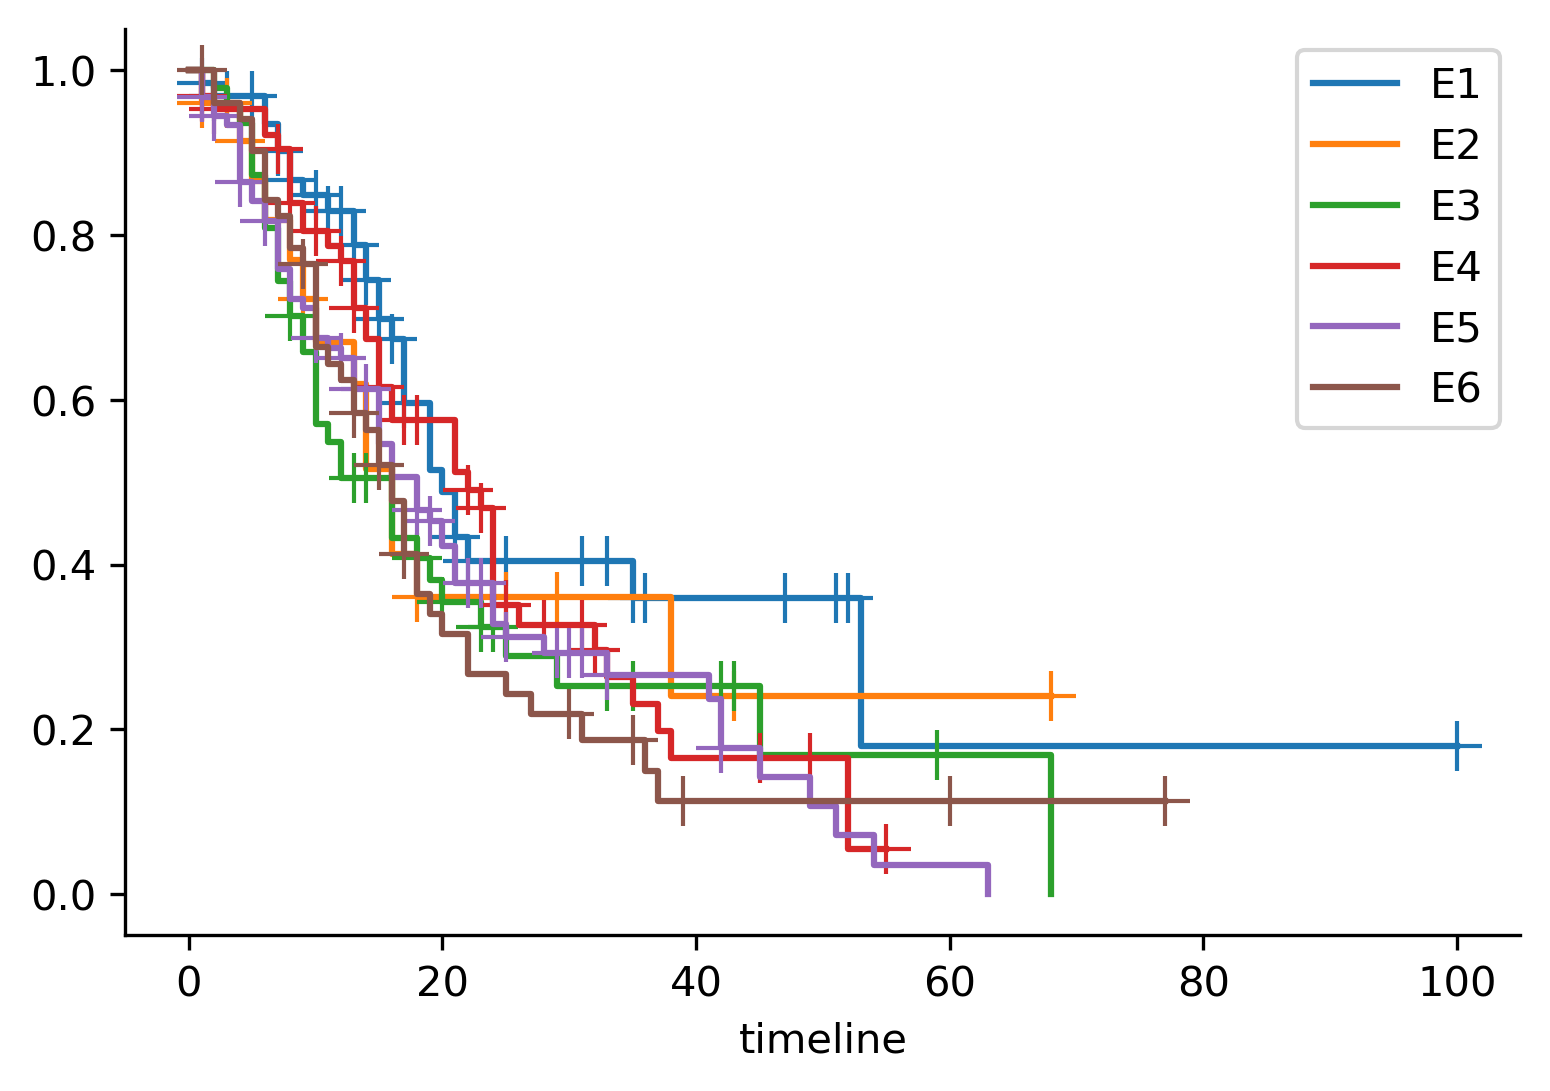

In [50]:
from lifelines import CoxPHFitter, KaplanMeierFitter
kmf = KaplanMeierFitter()
ft = combined.copy()
ft = ft[np.sum(pd.isnull(ft.values), axis=1).flatten() < 1]
ft['censor'] = [x - 1 for x in ft['censor']]
print(ft.shape)
for e in sorted(set(ft['ecotype'])):
    kmf.fit(ft[ft['ecotype']==e]['survival_time'],
            ft[ft['ecotype']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(os.path.join(figdir, 'ecotype_km.pdf'))

In [88]:
df = pd.read_csv('../data/ecotyper/results/denovo_discovery/Ecotypes/ecotypes.txt', sep='\t')
df

,CellType,State,InitialEcotype,ID,Ecotype
0,Acinar,S01,IE01,Acinar_S01,E1
1,B.cell,S02,IE01,B.cell_S02,E1
2,CD4.T.cell,S02,IE01,CD4.T.cell_S02,E1
3,CD8.T.cell,S01,IE01,CD8.T.cell_S01,E1
4,Dendritic,S04,IE01,Dendritic_S04,E1
5,Endothelial,S01,IE01,Endothelial_S01,E1
6,Erythrocyte,S03,IE01,Erythrocyte_S03,E1
7,Fibroblast,S02,IE01,Fibroblast_S02,E1
8,Monocyte,S03,IE01,Monocyte_S03,E1
9,Plasma,S01,IE01,Plasma_S01,E1


In [113]:
df = pd.read_csv('../data/ecotyper/results/denovo_discovery/Endothelial/gene_info.txt', sep='\t')
df

,Gene,IS01,IS02,IS03,IS04,IS05,IS06,State,MaxFC,InitialState
FILIP1,FILIP1,0.391985,1.480757,0.947877,-1.126056,-0.199395,-0.851617,S01,1.480757,IS02
ANK2,ANK2,0.653284,1.386882,0.957762,-0.972022,-0.410314,-1.098901,S01,1.386882,IS02
CNTNAP1,CNTNAP1,0.388560,1.286326,0.456481,-0.682439,-0.132874,-0.843204,S01,1.286326,IS02
FHL1,FHL1,0.446336,1.273427,0.606779,-0.717935,-0.023509,-1.073812,S01,1.273427,IS02
MBNL1_AS1,MBNL1_AS1,0.269989,1.272410,0.284660,-0.831945,0.475914,-0.864017,S01,1.272410,IS02
...,...,...,...,...,...,...,...,...,...,...
FJX1,FJX1,0.216685,-0.070296,0.450601,-0.207314,-0.894880,0.350528,S03,0.450601,IS03
AQP7,AQP7,0.245806,0.271182,0.438858,-0.590577,-0.101935,-0.100691,S03,0.438858,IS03
AOC2,AOC2,-0.291254,0.037865,0.406530,0.017746,-0.134442,0.046018,S03,0.406530,IS03
AC012557,AC012557,0.366081,0.175764,0.377349,-0.438268,-0.403013,-0.053545,S03,0.377349,IS03


In [114]:
# genes = pd.read_csv('../results/figures/ecotyper_v1/output.txt', sep='\t')
# g2t = {x:y for x, y in zip(genes['geneName'], genes['transcriptClass'])}
# df = df[[True if g2t.get(g)=='coding' else False for g in df.index]]
# df

In [115]:
for x in list(df[df['State']=='S03'].index)[:20]: print(x)

CYP39A1
MBOAT4
AKAP7
ALDH3A2
BMX
PDGFD
GABRA4
ABCB1
FLRT2
CTXND1
LRRC2
HUNK
SGK1
CNTN2
CCDC141
AQP1
AC008554
ADCY5
NR5A2
C7


In [116]:
pathways = pd.read_csv('../results/figures/ecotyper_v1/monocyte_s03_pathway.txt', sep='\t')
pathways['-log10(FDR)'] = [-np.log10(x) for x in pathways['q-value FDR B&H']]
pathways['Genes in pathway'] = pathways['Hit Count in Query List'].to_list()
# pathways['NK'] = go_pathways
pathways

,Category,ID,Name,Source,p-value,q-value Bonferroni,q-value FDR B&H,q-value FDR B&Y,Hit Count in Query List,Hit Count in Genome,Hit in Query List,-log10(FDR),Genes in pathway
0,GO: Biological Process,GO:0001775,cell activation,,9.464000e-07,0.000811,0.000811,0.005946,10,1623,"SPI1,STX11,ADA2,PIK3R5,GNA12,GPR183,FGR,SAMSN1...",3.090926,10
1,GO: Biological Process,GO:0045321,leukocyte activation,,3.908000e-05,0.033490,0.009565,0.070120,8,1447,"SPI1,STX11,ADA2,GPR183,FGR,SAMSN1,TNFRSF1B,MYO1F",2.019315,8
2,GO: Biological Process,GO:0002274,myeloid leukocyte activation,,4.565000e-05,0.039120,0.009565,0.070120,6,707,"SPI1,STX11,ADA2,FGR,TNFRSF1B,MYO1F",2.019315,6
3,GO: Biological Process,GO:0002366,leukocyte activation involved in immune response,,6.830000e-05,0.058540,0.009565,0.070120,6,760,"STX11,ADA2,GPR183,FGR,TNFRSF1B,MYO1F",2.019315,6
4,GO: Biological Process,GO:0002263,cell activation involved in immune response,,7.032000e-05,0.060270,0.009565,0.070120,6,764,"STX11,ADA2,GPR183,FGR,TNFRSF1B,MYO1F",2.019315,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,GO: Biological Process,GO:0044027,hypermethylation of CpG island,,3.952000e-03,1.000000,0.048300,0.354100,1,4,SPI1,1.316053,1
68,GO: Biological Process,GO:0150098,glial cell-neuron signaling,,3.952000e-03,1.000000,0.048300,0.354100,1,4,TNFRSF1B,1.316053,1
69,GO: Biological Process,GO:0046103,inosine biosynthetic process,,3.952000e-03,1.000000,0.048300,0.354100,1,4,ADA2,1.316053,1
70,GO: Biological Process,GO:0002694,regulation of leukocyte activation,,4.002000e-03,1.000000,0.048300,0.354100,4,680,"GPR183,FGR,SAMSN1,TNFRSF1B",1.316053,4


In [123]:
import numpy as np
np.log10(.05)

-1.3010299956639813

In [118]:
def get_survival_chart(pathways):
    chart = alt.Chart(pathways.iloc[:10], title='S03')
    chart = chart.mark_bar().encode(
        y=alt.Y(f'Name:N', axis=alt.Axis(title=None), sort='-x'),
        x=alt.X(f'Genes in pathway:Q', scale=alt.Scale(zero=False), axis=alt.Axis(grid=True),
               title='Genes in pathway'),
        color=alt.Color(f'-log10(FDR):Q', scale=alt.Scale(zero=True, scheme='oranges',)),
#                                                           domain=[0, 6.89])),
    )
    line = alt.Chart(pd.DataFrame({'x': [4.32]})).mark_rule(color='gray', strokeDash=[4,1]).encode(x='x')

    return chart + line

In [119]:
get_survival_chart(pathways)

alt.LayerChart(...)

In [124]:
np.log10(.05)

-1.3010299956639813

In [130]:
# m = None
# for s in sorted(set(df['State'])):
#     f = df[df['State']==s]
#     f = f[f['MaxFC']>.7]
#     if m is None:
#         m = f
#     else:
#         m = pd.concat((m, f))
# sns.boxplot(data=m, x='State', y='cytotrace_corr')

In [ ]:
cd8 s01 vs ecotyper states
cd8 s01 vs communities

In [49]:
cd8_df = get_ecotyper_df('CD8.T.cell', combined)
cd8_df

,S01,S02,S03,dataset,survival_time,censor,State
TCGA_OE_A75W_01A_12R_A32O_07,9.070696e-02,5.446537e-01,2.872844e-15,tcga,9.0,1.0,S02
TCGA_2J_AABT_01A_11R_A41B_07,3.232644e-01,3.408250e-15,3.408250e-15,tcga,11.0,0.0,S01
TCGA_IB_7886_01A_11R_2156_07,1.082692e-01,9.766980e-02,6.236753e-01,tcga,5.0,1.0,S03
TCGA_IB_AAUU_01A_11R_A37L_07,5.116097e-02,1.869499e-01,2.845515e-01,tcga,9.0,0.0,S03
TCGA_2J_AAB6_01A_11R_A41B_07,2.860363e-15,5.100305e-01,2.708994e-01,tcga,10.0,1.0,S02
...,...,...,...,...,...,...,...
T_11_02_A148a,1.157052e-02,4.500006e-01,3.919743e-01,kirby,21.0,1.0,S02
T_11_04_A026b,4.596190e-01,4.016061e-01,1.309880e-01,kirby,51.0,0.0,S01
T_11_05_A018b,1.097992e-01,3.297107e-01,1.429163e-01,kirby,38.0,1.0,S02
T_11_06_A011a,4.818242e-01,3.924164e-01,1.257595e-01,kirby,11.0,1.0,S01


In [54]:
large

,S01,S02,S03,dataset,survival_time,censor,State
TCGA_OE_A75W_01A_12R_A32O_07,2.076580e-01,2.726413e-15,2.726413e-15,tcga,9.0,1.0,S01
TCGA_2J_AABT_01A_11R_A41B_07,3.744291e-15,6.836495e-01,5.384032e-02,tcga,11.0,0.0,S02
TCGA_IB_7886_01A_11R_2156_07,1.565719e-01,5.427948e-02,7.624398e-01,tcga,5.0,1.0,S03
TCGA_IB_AAUU_01A_11R_A37L_07,5.414874e-01,1.099052e-02,3.113895e-01,tcga,9.0,0.0,S01
TCGA_2J_AAB6_01A_11R_A41B_07,2.663880e-15,2.663880e-15,2.663880e-15,tcga,10.0,1.0,S01
...,...,...,...,...,...,...,...
T_11_02_A148a,3.504311e-01,4.958170e-15,3.574600e-01,kirby,21.0,1.0,S03
T_11_04_A026b,1.219080e-02,5.764952e-01,3.356233e-01,kirby,51.0,0.0,S02
T_11_05_A018b,3.079670e-01,3.843720e-01,1.927671e-01,kirby,38.0,1.0,S02
T_11_06_A011a,8.235607e-04,6.507798e-01,3.952466e-02,kirby,11.0,1.0,S02


In [55]:
cd8_df

,S01,S02,S03,dataset,survival_time,censor,State
TCGA_OE_A75W_01A_12R_A32O_07,9.070696e-02,5.446537e-01,2.872844e-15,tcga,9.0,1.0,S02
TCGA_2J_AABT_01A_11R_A41B_07,3.232644e-01,3.408250e-15,3.408250e-15,tcga,11.0,0.0,S01
TCGA_IB_7886_01A_11R_2156_07,1.082692e-01,9.766980e-02,6.236753e-01,tcga,5.0,1.0,S03
TCGA_IB_AAUU_01A_11R_A37L_07,5.116097e-02,1.869499e-01,2.845515e-01,tcga,9.0,0.0,S03
TCGA_2J_AAB6_01A_11R_A41B_07,2.860363e-15,5.100305e-01,2.708994e-01,tcga,10.0,1.0,S02
...,...,...,...,...,...,...,...
T_11_02_A148a,1.157052e-02,4.500006e-01,3.919743e-01,kirby,21.0,1.0,S02
T_11_04_A026b,4.596190e-01,4.016061e-01,1.309880e-01,kirby,51.0,0.0,S01
T_11_05_A018b,1.097992e-01,3.297107e-01,1.429163e-01,kirby,38.0,1.0,S02
T_11_06_A011a,4.818242e-01,3.924164e-01,1.257595e-01,kirby,11.0,1.0,S01


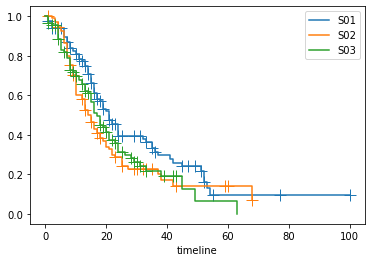

In [51]:
kmf = KaplanMeierFitter()
ft = cd8_df.copy()

for e in sorted(set(ft['State'])):
    kmf.fit(ft[ft['State']==e]['survival_time'],
            ft[ft['State']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

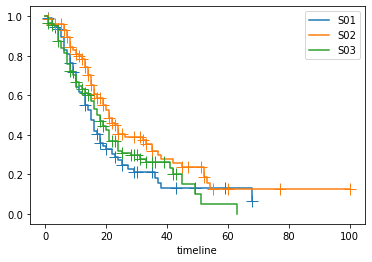

In [71]:
cd4_df = get_ecotyper_df('CD4.T.cell', combined)
kmf = KaplanMeierFitter()
ft = cd4_df.copy()

for e in sorted(set(ft['State'])):
    kmf.fit(ft[ft['State']==e]['survival_time'],
            ft[ft['State']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

In [47]:
tumor_df = get_ecotyper_df('Malignant', combined)
tumor_df

,S01,S02,S03,S04,S05,dataset,survival_time,censor,State
TCGA_OE_A75W_01A_12R_A32O_07,1.870591e-15,1.000000e+00,1.870591e-15,1.870591e-15,1.870591e-15,tcga,9.0,1.0,S02
TCGA_2J_AABT_01A_11R_A41B_07,2.443180e-15,2.443180e-15,8.836779e-02,7.441624e-02,1.869281e-01,tcga,11.0,0.0,S05
TCGA_IB_7886_01A_11R_2156_07,2.247507e-15,2.247507e-15,7.467957e-01,4.497574e-12,2.247507e-15,tcga,5.0,1.0,S03
TCGA_IB_AAUU_01A_11R_A37L_07,2.231055e-15,3.470668e-02,4.249288e-01,2.477501e-01,2.926144e-01,tcga,9.0,0.0,S03
TCGA_2J_AAB6_01A_11R_A41B_07,3.489073e-01,6.416283e-04,1.796297e-15,1.796297e-15,1.796297e-15,tcga,10.0,1.0,S01
...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,2.683709e-15,1.392683e-01,5.423820e-01,1.784887e-01,1.398609e-01,kirby,21.0,1.0,S03
T_11_04_A026b,3.467565e-15,7.639032e-06,1.478276e-01,1.488872e-01,1.553184e-01,kirby,51.0,0.0,S05
T_11_05_A018b,8.997434e-03,4.053723e-02,3.788588e-01,1.905203e-01,3.810862e-01,kirby,38.0,1.0,S05
T_11_06_A011a,2.124475e-01,9.285418e-02,3.073589e-02,7.246253e-11,1.978764e-01,kirby,11.0,1.0,S01


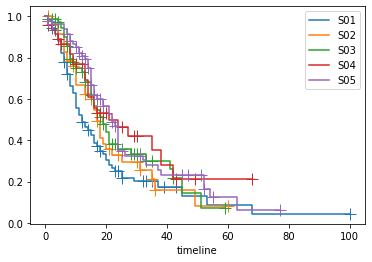

In [48]:
kmf = KaplanMeierFitter()
ft = tumor_df.copy()

for e in sorted(set(ft['State'])):
    kmf.fit(ft[ft['State']==e]['survival_time'],
            ft[ft['State']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )

In [64]:
caf_df = get_ecotyper_df('Fibroblast', combined)
caf_df

,S01,S02,S03,S04,S05,dataset,survival_time,censor,State
TCGA_OE_A75W_01A_12R_A32O_07,1.611976e-15,1.611976e-15,1.611976e-15,1.611976e-15,1.510254e-01,tcga,9.0,1.0,S05
TCGA_2J_AABT_01A_11R_A41B_07,1.858605e-15,5.103148e-01,1.299395e-01,1.858605e-15,8.621464e-02,tcga,11.0,0.0,S02
TCGA_IB_7886_01A_11R_2156_07,8.051025e-01,2.029807e-15,2.029807e-15,1.166969e-03,2.029807e-15,tcga,5.0,1.0,S01
TCGA_IB_AAUU_01A_11R_A37L_07,7.363717e-02,2.144198e-15,2.211124e-01,3.881618e-02,1.203640e-06,tcga,9.0,0.0,S03
TCGA_2J_AAB6_01A_11R_A41B_07,1.995320e-02,1.747717e-15,1.747717e-15,5.419461e-01,1.331808e-01,tcga,10.0,1.0,S04
...,...,...,...,...,...,...,...,...,...
T_11_02_A148a,4.107413e-01,3.494453e-15,1.788558e-01,6.616552e-02,3.494453e-15,kirby,21.0,1.0,S01
T_11_04_A026b,1.260433e-01,5.298288e-01,2.363757e-01,5.396888e-03,9.019541e-02,kirby,51.0,0.0,S02
T_11_05_A018b,1.279687e-01,4.985242e-02,5.796129e-01,4.833660e-02,5.232956e-02,kirby,38.0,1.0,S03
T_11_06_A011a,8.992044e-10,3.721383e-01,3.628077e-01,1.198717e-01,1.451559e-01,kirby,11.0,1.0,S02


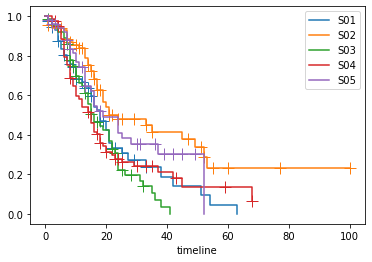

In [66]:
kmf = KaplanMeierFitter()
ft = caf_df.copy()

for e in sorted(set(ft['State'])):
    kmf.fit(ft[ft['State']==e]['survival_time'],
            ft[ft['State']==e]['censor'],
            label=e)
    ax = kmf.plot(show_censors=True, ci_show=False, )